# ROS susceptibility analysis using BRENDA

In [2]:
import pandas as pd
from zeep import Client
import json
import pprint
import matplotlib.pyplot as plt
from collections import Counter
import re
from pprint import pprint
from upsetplot import from_indicators
from upsetplot import UpSet

__Read h2o2 and superoxide files with susceptible EC numbers__

In [2]:
### Reading files
colnames = ['Ligand', 'EC', 'Info', 'Number', 'Chebi', '1', '2', '3']
H2O2_full_data = pd.read_csv('brenda_results_H2O2.csv', sep = '\t', names=colnames, header=None)
superoxide_full_data = pd.read_csv('brenda_results_superoxide.csv', sep = '\t', names=colnames, header=None)

In [3]:
h2o2_data = H2O2_full_data[["EC", "Info"]]
superoxide_data = superoxide_full_data[["EC", "Info"]]

In [4]:
# Filter only those rows where ROS act as an inhibitor
h2o2_sset = h2o2_data[h2o2_data["Info"].str.contains("Inhibitor", na=False)]
superoxide_sset = superoxide_data[superoxide_data["Info"].str.contains("Inhibitor", na=False)]

In [5]:
# Get all the EC numbers susceptible to ROS avoiding repetitions
h2o2_enz = set(h2o2_sset["EC"])
superoxide_enz = set(superoxide_sset["EC"])

all_enz = h2o2_enz | superoxide_enz
print(len(all_enz))

253


In [6]:
# Read .json with relation UniProt ID - EC number
with open('UniProt_EC.json', 'r') as file:
    UP_EC = json.load(file)

In [7]:
enz_count = 0 
for UniProt, ec in UP_EC.items():
    if ec in all_enz:
        enz_count += 1
        print(f'Enzyme {UniProt} is susceptible to ROS')
        
print(f'{enz_count} enzymes affected by ROS!')

Enzyme Q88L24 is susceptible to ROS
Enzyme Q88KF1 is susceptible to ROS
Enzyme Q88KF4 is susceptible to ROS
Enzyme Q88QK9 is susceptible to ROS
Enzyme Q88RL4 is susceptible to ROS
Enzyme Q88FY4 is susceptible to ROS
Enzyme Q88PD5 is susceptible to ROS
Enzyme Q88FS2 is susceptible to ROS
Enzyme Q88GK8 is susceptible to ROS
Enzyme Q88FB1 is susceptible to ROS
Enzyme Q88C17 is susceptible to ROS
Enzyme Q88PA4 is susceptible to ROS
Enzyme Q88PF3 is susceptible to ROS
Enzyme Q88RQ7 is susceptible to ROS
Enzyme Q88R06 is susceptible to ROS
Enzyme Q88QT9 is susceptible to ROS
Enzyme Q88QS2 is susceptible to ROS
Enzyme Q88QR6 is susceptible to ROS
Enzyme Q88QJ6 is susceptible to ROS
Enzyme Q88Q97 is susceptible to ROS
Enzyme Q88PW6 is susceptible to ROS
Enzyme Q88PP0 is susceptible to ROS
Enzyme P59392 is susceptible to ROS
Enzyme Q88PA6 is susceptible to ROS
Enzyme Q88P52 is susceptible to ROS
Enzyme Q88P43 is susceptible to ROS
Enzyme Q88NX1 is susceptible to ROS
Enzyme Q88NP7 is susceptible

In [8]:
print(all_enz)

{'1.17.1.4', '1.14.14.20', '1.13.12.19', '3.4.21.53', '4.1.1.59', '2.5.1.18', '1.10.3.2', '3.5.3.15', '1.13.11.57', '1.8.1.12', '4.1.1.2', '1.11.2.6', '1.13.11.47', '3.4.21.63', '1.1.3.9', '3.4.22.3', '3.5.2.5', '1.7.3.3', '1.2.1.8', '1.7.2.6', '1.17.4.1', '4.2.2.10', '1.13.11.18', '1.1.3.10', '1.2.1.12', '1.7.3.6', '2.1.1.5', '6.2.1.15', '1.12.2.1', '3.1.4.4', '1.2.1.46', '3.4.22.40', '1.1.3.47', '1.14.14.156', '3.2.1.4', '1.2.1.5', '1.8.5.1', '3.1.1.75', '3.5.3.6', '1.8.4.11', '3.1.3.B4', '6.4.1.2', '1.1.3.7', '1.2.3.4', '1.3.98.3', '1.7.2.8', '3.2.1.1', '1.13.11.1', '1.8.1.7', '1.14.13.62', '2.7.7.9', '3.5.1.2', '1.11.1.14', '1.11.1.21', '1.11.2.2', '2.3.3.16', '4.2.1.3', '5.4.4.3', '4.2.1.103', '1.11.1.19', '3.3.2.9', '7.2.2.13', '1.14.13.39', '2.3.1.21', '2.8.1.1', '3.5.1.4', '1.5.1.2', '1.6.3.2', '1.13.11.2', '1.9.6.1', '1.11.1.1', '3.1.2.1', '1.8.1.4', '1.14.18.3', '1.14.19.26', '2.3.3.3', '1.11.2.3', '1.11.1.6', '4.2.1.2', '4.2.3.12', '1.14.11.2', '4.1.1.39', '3.2.2.24', '3.5.4

## BRENDA pyrser

In [9]:
from brendapyrser import BRENDA

In [10]:
dataFile = "brenda_2025.txt"
brenda = BRENDA(dataFile)
print(brenda)

In [19]:
print(dir(brenda))

['_BRENDA__copyright', '_BRENDA__ec_numbers', '_BRENDA__fields', '_BRENDA__getRxnData', '_BRENDA__initializeReactionObjects', '_BRENDA__reactions', '_BRENDA__units', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_repr_html_', 'copyright', 'fields', 'getKMcompounds', 'getOrganisms', 'reactions', 'units']


In [ ]:
# Get the name of all proteins which are inhibited by ROS
# This can be used to check susceptible reactions in the ROS table
for enz in list(all_enz):
    try:
        r = brenda.reactions.get_by_id(enz)
        print(r.name)
    except:
        print(f'EC {enz} not found in BRENDA database!')

In [13]:
e = list(all_enz)[0]
r = brenda.reactions.get_by_id(enz)
r

Enzyme identifier,1.11.2.3
Name,Plant seed peroxygenase
Systematic name,substrate:hydroperoxide oxidoreductase (RH-hydroxylating or
Reaction type,Sulfoxidation
Reaction,R1H + R2OOH <=> R1OH + R2OH


## BRENDA cofactors

In [11]:
cof_dict = {}
for enz in list(all_enz):
    try:
        r = brenda.reactions.get_by_id(enz)
        print(r.name)
        cof = r.cofactors
        cof_dict[enz] = cof
    except:
        print(f'EC {enz} not found in BRENDA database!')

Xanthine dehydrogenase
Phenol 2-monooxygenase (fadh2)
2-oxoglutarate dioxygenase (ethene-forming)
Endopeptidase la
Gallate decarboxylase
Glutathione transferase
Laccase
Protein-arginine deiminase
Gallate dioxygenase
Trypanothione-disulfide reductase
Oxalate decarboxylase
L-tyrosine peroxygenase
3-hydroxy-4-oxoquinoline 2,4-dioxygenase
Oryzin
Galactose oxidase
Ficain
Allantoinase
Factor-independent urate hydroxylase
Betaine-aldehyde dehydrogenase
Hydroxylamine dehydrogenase
Ribonucleoside-diphosphate reductase
Pectin lyase
Persulfide dioxygenase
Pyranose oxidase
Glyceraldehyde-3-phosphate dehydrogenase (phosphorylating)
Hydroxylamine oxidase (cytochrome)
Betaine-homocysteine s-methyltransferase
Arachidonate-coa ligase
Cytochrome-c3 hydrogenase
Phospholipase d
Formaldehyde dehydrogenase
Bleomycin hydrolase
5-(hydroxymethyl)furfural oxidase
Tryptophan n-monooxygenase
Cellulase
Aldehyde dehydrogenase [nad(p)+]
Glutathione dehydrogenase (ascorbate)
Poly(3-hydroxybutyrate) depolymerase
Argin

In [12]:
# En cof_dict values tengo toda la información acerca de los cofactores encontrados en las proteínas susceptibles a ROS
# Basta con hacer una lista y contar la proporción de cada cofactor, para hacerse una idea de la cantidad de ellos
all_cofs = []
for rxn, cofs in cof_dict.items():
    for c in cofs.keys():
        all_cofs.append(c)
    

# Quizá luego es conveniente comprobar que se ha encontrado en bacterias cercanas a P.putida (más adelante)

In [13]:
print(len(all_cofs))

585


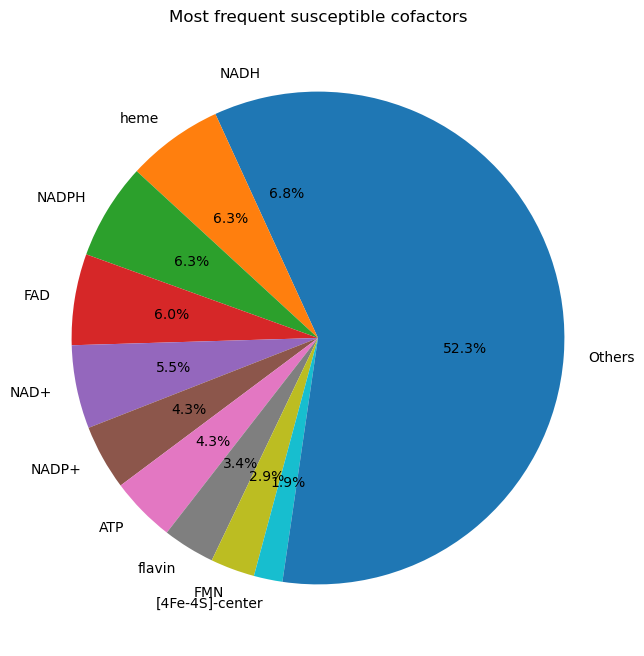

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# Count frequencies
counts = Counter(all_cofs)

# Top 10 most common
top_counts = counts.most_common(10)
top_elements, top_values = zip(*top_counts)

# Add the rest to "Others"
others_value = sum(counts.values()) - sum(top_values)
if others_value > 0:
    top_elements += ("Others",)
    top_values += (others_value,)

# Crear diagrama de tarta
plt.figure(figsize=(8,8))
plt.pie(top_values, labels=top_elements, autopct='%1.1f%%', startangle=90)
plt.title("Most frequent susceptible cofactors")
plt.show()

### Analysis divided by EC

In [17]:
total_susceptible = len(all_enz)

ec_dict = {
    '1':'Oxidoreductases',
    '2':'Transferases',
    '3':'Hydrolases',
    '4':'Lyases',
    '5':'Isomerases',
    '6':'Ligases',
    '7':'Translocases'
}

term_dict = {
    'Oxidoreductases':[],
    'Transferases':[],
    'Hydrolases':[],
    'Lyases':[],
    'Isomerases':[],
    'Ligases':[],
    'Translocases':[]  
}

In [19]:
for enz in all_enz:
    for n in ec_dict.keys():
        if enz.startswith(n):
            term = ec_dict[n]
            term_dict[term].append(enz)
            break

print(term_dict)

{'Oxidoreductases': ['1.14.13.62', '1.14.12.12', '1.11.1.8', '1.14.14.20', '1.7.2.6', '1.1.3.9', '1.11.2.3', '1.14.11.69', '1.13.11.18', '1.1.1.42', '1.11.1.13', '1.4.3.22', '1.2.3.7', '1.13.11.2', '1.6.5.5', '1.14.16.1', '1.10.3.3', '1.13.11.16', '1.11.1.5', '1.2.1.12', '1.13.99.1', '1.1.1.77', '1.2.3.4', '1.11.1.1', '1.14.13.7', '1.3.98.3', '1.8.3.2', '1.13.11.76', '1.14.11.30', '1.7.3.6', '1.14.16.5', '1.14.99.B10', '1.8.4.2', '1.1.3.13', '1.8.1.4', '1.97.1.12', '1.13.12.24', '1.11.1.14', '1.11.2.1', '1.13.11.1', '1.14.14.1', '1.13.11.8', '1.21.3.3', '1.14.11.2', '1.1.3.47', '1.10.3.2', '1.17.4.1', '1.16.3.1', '1.2.1.46', '1.14.18.1', '1.14.19.22', '1.5.1.34', '1.13.11.47', '1.8.1.7', '1.14.11.1', '1.2.1.13', '1.12.2.1', '1.11.2.2', '1.11.1.7', '1.1.1.40', '1.4.3.3', '1.11.1.21', '1.17.3.2', '1.9.6.1', '1.13.11.5', '1.13.11.50', '1.13.11.15', '1.1.1.200', '1.11.1.24', '1.14.14.173', '1.14.19.26', '1.14.18.3', '1.13.11.52', '1.11.2.4', '1.4.1.2', '1.14.11.66', '1.5.1.36', '1.1.1.363'

In [135]:
print(len(all_enz))

253


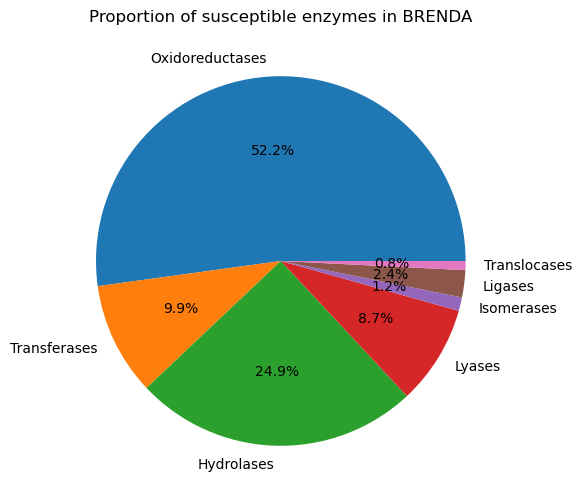

In [23]:
labels = list(term_dict.keys())

sizes = [len(v) for v in term_dict.values()]

# Dibujar el pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Proportion of susceptible enzymes in BRENDA")
plt.show()

This graph shows the proportion of each EC class whithin BRENDA susceptible data (enzymes in which ROS act as an inhibitor)

__Get cofactors for each EC type__

In [30]:
cof_dict = {
    'Oxidoreductases':[],
    'Transferases':[],
    'Hydrolases':[],
    'Lyases':[],
    'Isomerases':[],
    'Ligases':[],
    'Translocases':[]  
}

for term, ec_list in term_dict.items():
    for ec in ec_list:
        try:
            r = brenda.reactions.get_by_id(ec)
            cofactors = r.cofactors
            for c in cofactors.keys():
                if c:
                    cof_dict[term].append(c)
        except:
            print(f'EC {ec} not found in database!')


EC 1.14.99.B10 not found in database!
EC 1.11.1.B2 not found in database!
EC 3.1.5.B1 not found in database!
EC 3.1.3.B4 not found in database!


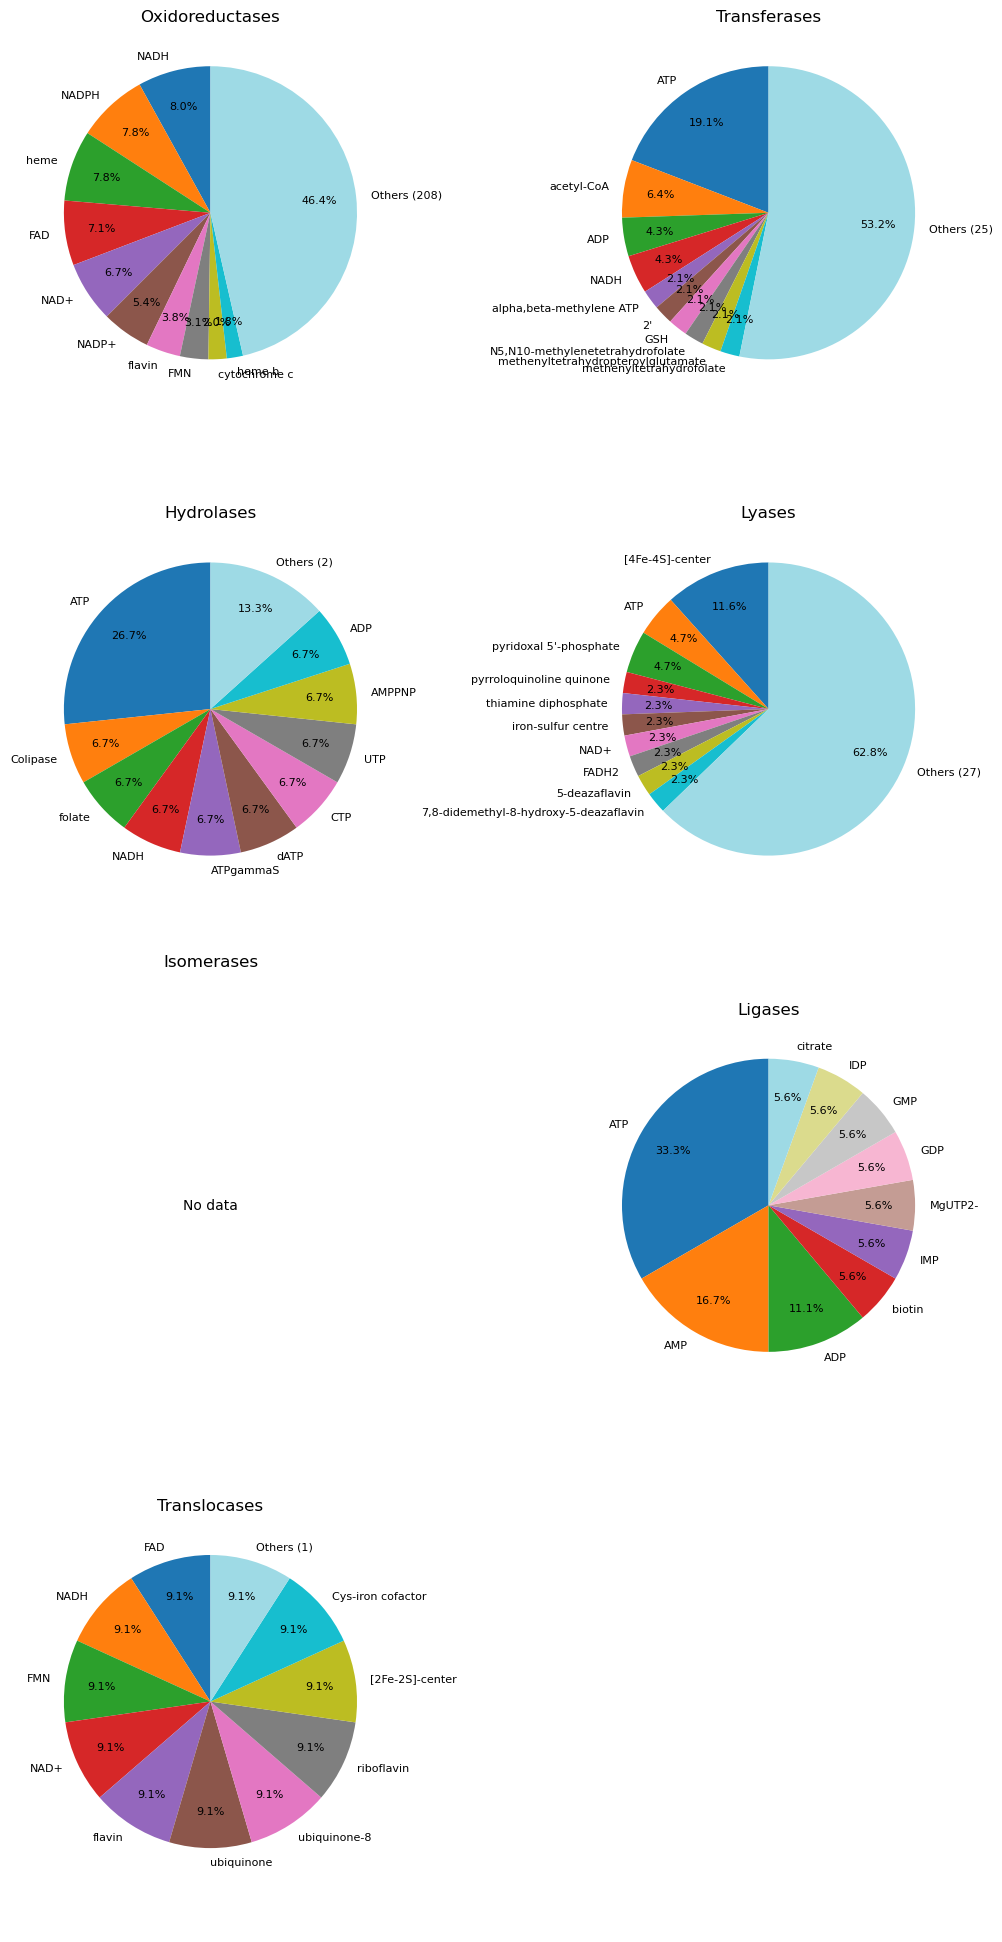

In [51]:
from collections import Counter
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cm
import numpy as np

num_plots = len(cof_dict)  
rows, cols = 4, 2

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()

for ax, (term, cofs) in zip(axes, cof_dict.items()):
    counts = Counter(cofs)
    top_counts = counts.most_common(10)

    if len(top_counts) == 0:
        ax.text(0.5, 0.5, "No data", ha='center', va='center')
        ax.set_title(term)
        ax.axis("off")
        continue

    top_elements, top_values = zip(*top_counts)

    others_value = sum(counts.values()) - sum(top_values)
    top_elements = list(top_elements)
    top_values = list(top_values)

    if others_value > 0:
        top_elements.append(f"Others ({others_value})")
        top_values.append(others_value)

    # Different colors
    colors = cm.tab20(np.linspace(0, 1, len(top_values)))

    ax.pie(
        top_values,
        labels=top_elements,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.75,
        labeldistance=1.1,
        colors=colors,
        textprops={'fontsize': 8}
    )
    ax.set_title(term)

# Hide empty plots
for ax in axes[num_plots:]:
    ax.axis("off")

plt.tight_layout()
plt.show()



This plots show the proportion of each cofactor for each Enzyme Class. Only the 10 most representative are shown. 

## Brenda analysis filtering soluble cofactors

In [15]:
# Soluble cofactors must not be taken into account, as they are not indicative of ROS effect
# They do not form part of the protein structure
# Hence, we will focus only on a subset of possible cofactors

# Define a set of structural cofactors:
structural_cofactors = {
    '[2Fe-2S]-center',
    '[2Fe-2S] cluster',
    '[3Fe-4S]1+ cluster',
    '[4Fe-4S]1+ cluster',
    '[4Fe-4S] cluster',
    '[4Fe-4S] center',
    '[4Fe-4S]-center',
    'Fe-S center',
    'iron-sulfur centre',
    '4Fe-4S-center',
    'Fe2 III/III-Y radical cofactor',
    'dimanganese-tyrosyl radical cofactor',
    'MnIV/FeIII cofactor',
    'manganese-iron cofactor',
    'Mn/Fe redox cofactor',
    'FeMn center',
    'dimanganese',
    'rubredoxin',
    'Ferredoxin',
    '[Ni-Fe]-center',
    'zinc',
    'cytochrome',
    'cytochrome b5',
    'cytochrome c554',
    'cytochrome c552',
    'cytochrome c3',
    'cytochrome P460',
    'cytochrome P468',
    'cytochrome P450',
    'heme',
    'heme b',
    'heme c',
    'protoheme'
    #'chlorophyll a',     
    #"chlorophyll a'",
    #'Chlorophyll',
    #'phylloquinone',    
}
  
# Note that some cofactors are anotated differently but refer to the same cofactor
# These names have to be changed
FeS_clusters = ['[2Fe-2S]-center','[2Fe-2S] cluster', 'Fe-S center', '[4Fe-4S]1+ cluster',
                '[4Fe-4S] cluster','[4Fe-4S] center','[4Fe-4S]-center', '4Fe-4S-center',
                'iron-sulfur centre', '[3Fe-4S]1+ cluster']
Fe_Mn_centers = ['MnIV/FeIII cofactor','manganese-iron cofactor', 'Mn/Fe redox cofactor','FeMn center']

Heme_groups = ['heme','heme b','heme c', 'protoheme']
                 
Cytochromes = ['cytochrome','cytochrome b5','cytochrome c554','cytochrome c552','cytochrome c3','cytochrome P460',
               'cytochrome P468','cytochrome P450']

In [16]:
def rename_cofactors(cofs_list):
    "Rename cofactors with similar names onto the same nomenclature"
    
    FeS_clusters = ['[2Fe-2S]-center','[2Fe-2S] cluster', 'Fe-S center', '[4Fe-4S]1+ cluster',
                '[4Fe-4S] cluster','[4Fe-4S] center','[4Fe-4S]-center', '4Fe-4S-center',
                'iron-sulfur centre', '[3Fe-4S]1+ cluster']
    Fe_Mn_centers = ['MnIV/FeIII cofactor','manganese-iron cofactor', 'Mn/Fe redox cofactor','FeMn center']

    Heme_groups = ['heme','heme b','heme c', 'protoheme']
                 
    Cytochromes = ['cytochrome','cytochrome b5','cytochrome c554','cytochrome c552','cytochrome c3','cytochrome P460',
               'cytochrome P468','cytochrome P450']
    
    renamed_filt_cofs_list = []
    
    for filt_cof in cofs_list:
        if filt_cof in FeS_clusters:
            renamed_filt_cofs_list.append('FeS cluster')
        elif filt_cof in Fe_Mn_centers:
            renamed_filt_cofs_list.append('Fe-Mn center')
        elif filt_cof in Heme_groups:
            renamed_filt_cofs_list.append('Heme group')
        elif filt_cof in Cytochromes:
            renamed_filt_cofs_list.append('Cytochrome')
        else:
            renamed_filt_cofs_list.append(filt_cof)
            
    return renamed_filt_cofs_list

In [17]:
# Filter cofactors data
filt_cof_dict = {}
for term, cofs in cof_dict.items():
    cofs = set(cofs)
    renamed = []
    
    # Filter cofactors
    filt_cofs = cofs & structural_cofactors
    
    if filt_cofs:
        filt_cofs_list = list(filt_cofs)
        
        # Rename cofactors
        renamed = rename_cofactors(filt_cofs_list)
    
    if renamed:
        filt_cof_dict[term] = renamed

pprint(filt_cof_dict) 

{'1.10.3.3': ['Heme group'],
 '1.11.1.1': ['rubredoxin'],
 '1.11.1.11': ['Heme group'],
 '1.11.1.13': ['Heme group', 'Heme group'],
 '1.11.1.14': ['Heme group'],
 '1.11.1.16': ['Heme group', 'Heme group'],
 '1.11.1.19': ['Heme group'],
 '1.11.1.21': ['Heme group'],
 '1.11.1.5': ['Heme group'],
 '1.11.1.6': ['Heme group', 'Heme group'],
 '1.11.1.7': ['Heme group', 'Heme group'],
 '1.11.1.8': ['Heme group', 'Heme group'],
 '1.11.2.1': ['Heme group', 'Cytochrome'],
 '1.11.2.2': ['Heme group'],
 '1.11.2.3': ['Heme group'],
 '1.11.2.4': ['Heme group'],
 '1.11.2.6': ['Heme group', 'Heme group'],
 '1.12.2.1': ['[Ni-Fe]-center', 'FeS cluster', 'Cytochrome', 'Heme group'],
 '1.13.11.49': ['Heme group', 'Heme group'],
 '1.13.11.50': ['Heme group'],
 '1.13.11.52': ['Heme group'],
 '1.13.11.9': ['Heme group'],
 '1.14.12.12': ['FeS cluster'],
 '1.14.12.17': ['Cytochrome', 'Heme group'],
 '1.14.13.39': ['Heme group', 'Heme group'],
 '1.14.13.7': ['FeS cluster', 'Cytochrome'],
 '1.14.14.1': ['Heme gr

In [18]:
def plot_structural_cofactors_by_class(feature_dict, figsize=(7,7)):
    """
    Para cada clave del diccionario (p. ej. Oxidoreductases),
    genera un pie chart con la frecuencia de los cofactores estructurales
    contenidos en su lista de valores.
    """

    # Color map
    color_map = plt.cm.tab20

    for enzyme_class, cofactors in feature_dict.items():

        if not cofactors:
            # Avoid empty graphs
            continue

        # Count ocurrences
        counts = Counter(cofactors)

        labels = list(counts.keys())
        sizes = list(counts.values())
        total = sum(sizes)

        # Add colors
        colors = [color_map(i % 20) for i in range(len(labels))]

        # Plot
        plt.figure(figsize=figsize)
        plt.pie(
            sizes,
            labels=labels,
            autopct=lambda pct: f"{pct:.1f}%",
            startangle=90,
            colors=colors
        )

        plt.title(f"{enzyme_class}")
        plt.axis("equal")
        plt.show()

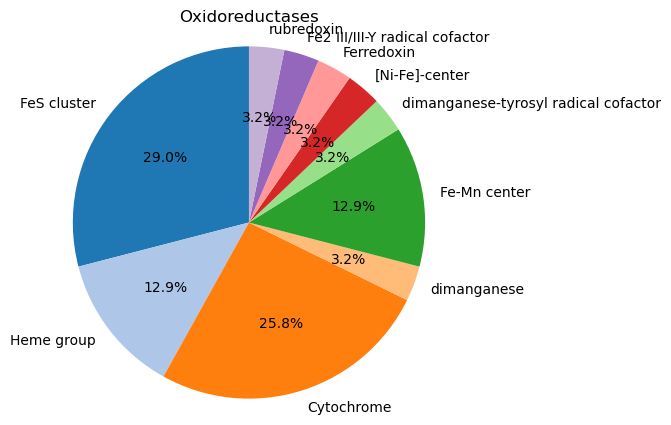

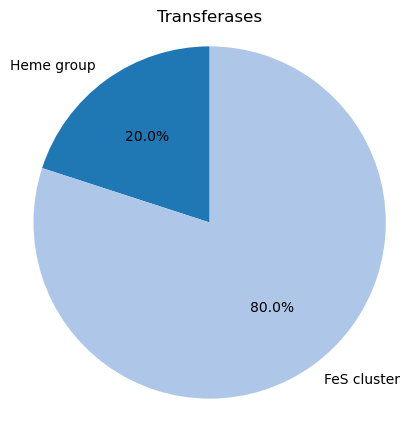

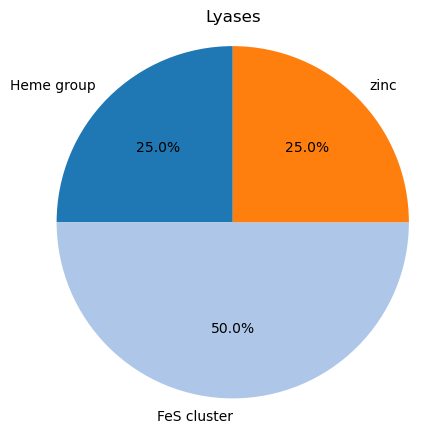

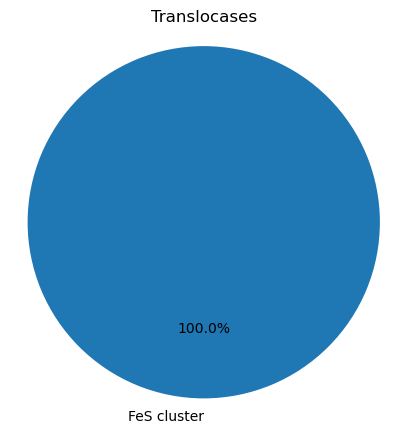

In [301]:
plot_structural_cofactors_by_class(filt_cof_dict, figsize=(5,5))

These plots show the proportion of each cofactor (filtered and renamed) found in each Enzyme Class, considering only structural cofactors. Only Enzyme Classes with structural cofactors are shown.

### Proportion of structural cofactors 

In [19]:
# Get unique cofactors
all_cofs = []
for term, cofs in cof_dict.items():
    for c in cofs:
        all_cofs.append(c)

# Filter by structural cofactors
all_struct_cofs = []
for cof in all_cofs:
    if cof in structural_cofactors:
        all_struct_cofs.append(cof)
        
print('Total cofactors:', len(all_cofs))
print('Structural cofactors', len(all_struct_cofs))

Total cofactors: 585
Structural cofactors 113


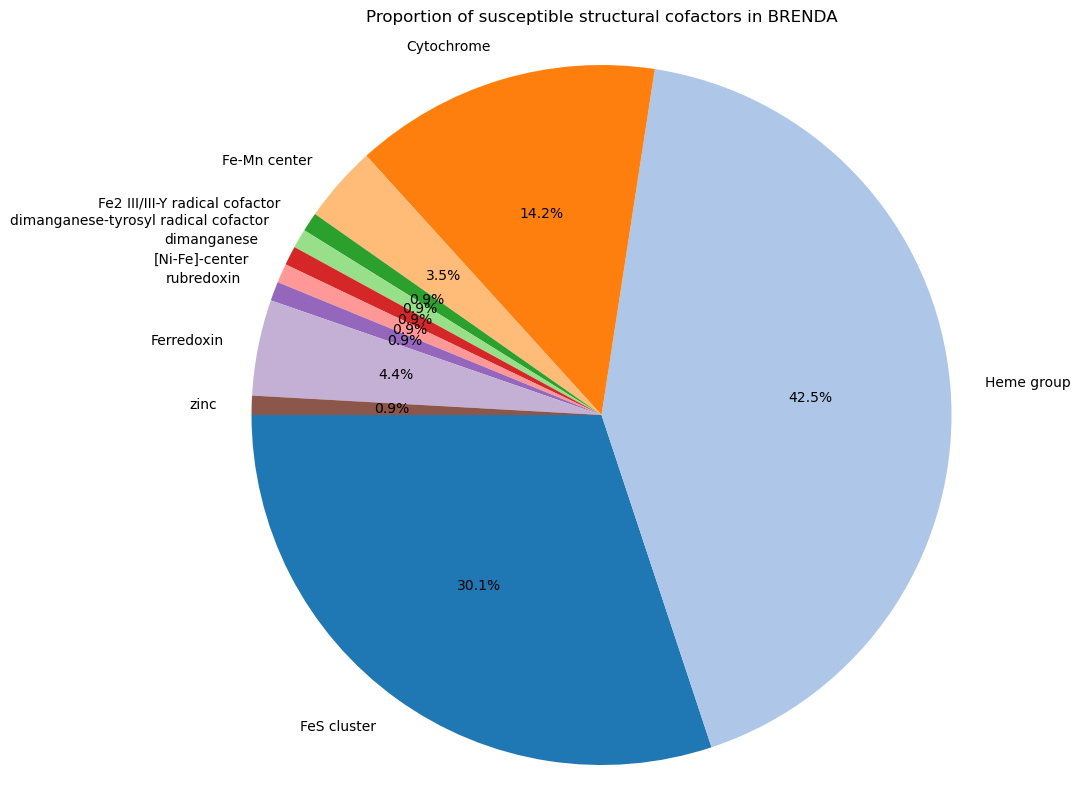

In [32]:
renamed_cofactors = rename_cofactors(all_struct_cofs)

### Plot pie chart
counts = Counter(renamed_cofactors)

labels = list(counts.keys())     
sizes = list(counts.values()) 

colors = plt.cm.tab20(range(len(labels)))

plt.figure(figsize=(12,10))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%",  
    startangle=180,
    colors=colors
)

plt.title("Proportion of susceptible structural cofactors in BRENDA")
plt.axis("equal")  # círculo perfecto

plt.savefig(f"BRENDA_cofs.svg", bbox_inches="tight")

plt.show()

# Analysis of our own data

In [6]:
def get_features_num(table, normalize = False):
    "Returns a dictionary with the number of each structural feature for a given set of proteins"
    # Number of proteins with SR in AS
    num_SR_AS = len(table[table["# SR in AS"] > 0]["# SR in AS"].tolist())

    # Number of proteins with SR in BS
    num_SR_BS = len(table[table["# SR in BS"] > 0]["# SR in BS"].tolist())
    
    # Number of proteins with cysteins in functional sites
    cys_num = len(table[(table["cys in AS"] > 0) | (table["cys in BS"] > 0)]
                 ["cys in AS"].tolist())

    # Number of proteins with cofactors (divided by type)
    pattern = r'\d+Fe-\d+S'
    with_cofactors = table[table["Cofactor"].notna()]
    num_FeS = 0
    num_cof = 0
    for cof in list(with_cofactors["Cofactor"]):
        match = re.findall(pattern, cof)
        if match:
            num_FeS += 1
        else:
            num_cof +=1

    # Proteins with nothing
    num_nothing = len(table[(table["# SR in AS"] == 0) &
                            (table["# SR in BS"] == 0) &
                            (table["Cofactor"].isna())])
    
    if normalize:
        total = table.shape[0]
        if total == 0:
            return {}
        num_SR_AS = num_SR_AS / total
        num_SR_BS = num_SR_BS / total
        num_FeS = num_FeS / total
        num_cof = num_cof / total
        cys_num = cys_num / total
        num_nothing = num_nothing / total

    features_dict = {
        'Suceptible Active Sites': num_SR_AS, 
        'Susceptible Binding Sites': num_SR_BS, 
        'Fe-S clusters': num_FeS, 
        'Cofactors':num_cof,
        'Functional cysteins': cys_num,
        'Nothing':num_nothing
    }

    return features_dict


def show_values(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute}"


def plot_features(features_dict, number_enzymes, title, figsize=(7,7)):
    "Plots pie chart with the number of each structural features for a given dataset"
    
    # Color map
    COLOR_MAP = {
    'Suceptible Active Sites': '#1f77b4',
    'Susceptible Binding Sites': '#ff7f0e',
    'Fe-S clusters': '#2ca02c',
    'Functional cysteins': '#8c564b',
    'Cofactors': '#d62728',
    'Nothing': '#9467bd'
    }
    
    # Clean empty values
    clean_dict = {k: v for k, v in features_dict.items() 
                  if v is not None and v > 0}
    
    labels = list(clean_dict.keys())
    sizes = list(clean_dict.values())

    # Colors
    colors = [COLOR_MAP[label] for label in labels]

    # Create plot
    plt.figure(figsize=figsize)
    plt.pie(
        sizes,
        labels=labels,
        autopct=lambda pct: show_values(pct, sizes),
        startangle=90,
        colors=colors
    )
    
    plt.title(f"{title} (total = {number_enzymes})")
    plt.axis('equal')  # Mantener el círculo redondo
    plt.show()
    
    
def plot_sf_relative_proportions(susc_features_dict, nosusc_features_dict, ec_class, title = 'Comparison of structural features', figsize=(10,6)):
    "Plots bar plot with the proportions of each structural feature in evidenced and no evidenced datasets"
    labels = list(susc_features_dict.keys())
    values1 = list(susc_features_dict.values())
    values2 = list(nosusc_features_dict.values())

    x = np.arange(len(labels))           
    width = 0.35                         

    plt.figure(figsize=figsize)
    
    color_evidenced = "#ff7f0e"  
    color_no_evidenced = "#1f77b4"  

    bars1 = plt.bar(x - width/2, values1, width, label='Susceptible enzymes', color = color_evidenced)
    bars2 = plt.bar(x + width/2, values2, width, label='No susceptible enzymes', color = color_no_evidenced)

    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2,
                height,
                f'{height*100:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9
            )

    plt.xticks(x, labels, rotation=45, ha='right')
    plt.ylabel('Proportion')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(f"bar_plot{ec_class}.svg", bbox_inches="tight")
    
    plt.show()

    
def boolean_matrix(df):
    """
    Transforms original dataset into a boolean matrix of structural features for UpSet plotting
    """
    # Add functional cystein and Fe-S columns into the original dataset
    df["functional cys"] = df["cys in AS"] + df["cys in BS"]
    df["Fe-S cluster"] = (
        df["Cofactor"].str.contains(r'\d+Fe-\d+S', regex = True, case=False, na=False).astype(int)
        )
    
    # Transform into binary representation for UpSet plotting
    sf_data = df[["# SR in AS", "# SR in BS", "Cofactor", "functional cys", "Fe-S cluster", "# Disulfide bonds"]].copy()
    sf_data.columns = ["Susceptible Active Sites", "Susceptible Binding Sites", \
                       "Cofactor", "Functional cysteines", "Fe-S cluster", "Disulfide bonds"]
    
    sf_data["Susceptible Active Sites"] = (sf_data["Susceptible Active Sites"] > 0).astype(int)
    sf_data["Susceptible Binding Sites"] = (sf_data["Susceptible Binding Sites"] > 0).astype(int)
    sf_data["Functional cysteines"] = (sf_data["Functional cysteines"] > 0).astype(int)
    sf_data["Disulfide bonds"] = (sf_data["Disulfide bonds"] > 0).astype(int)
    
    pattern = r'\d+Fe-\d+S'
    sf_data["Cofactor"] = (
        sf_data["Cofactor"]
        .fillna("none")
        .apply(
            lambda x: int(
                (x.lower() != "none") and
                (re.search(pattern, x) is None)
            )
        )
    )
    
    # Transform into boolean
    sf_bool = sf_data.astype(bool)

    upset_data = from_indicators(
        sf_bool.columns,
        sf_bool
    )

    return upset_data

In [9]:
# Read .json
with open('UniProt_EC.json', 'r') as file:
    UP_EC = json.load(file)

In [3]:
# Extracting a subset of the data: get all enzymes with BRENDA evidence and incorporate information into the table
ros_table = pd.read_csv('ROS_summary_BRENDA_full.tsv', sep = '\t', encoding='latin1')
ros_table.head()

,KEGG ID,UniProt ID,Gene,Protein,# SR in AS,Mean SR - AS minimum distance,cys in AS,# SR in BS,Mean SR - BS minimum distance,cys in BS,# Disulfide bonds,Mean S-S - AS/BS minimum distance,Cofactor,Subsystem,Evidence,Study organism,ecNumber,EC class,BRENDA evidence,BRENDA organism
0,PP_0243,Q88R90,gshA,Glutamate--cysteine ligase,0,0.00,0,0,0.00,0,0,0.0,NaN,S_Glutamate_Metabolism,Reduction of disulfide bonds lead to the inact...,Arabidopsis Thaliana,6.3.2.2,Ligases,NaN,NaN
1,PP_0808,Q88PP0,hmp,Flavohemoprotein,1,4.51,0,8,5.11,0,0,0.0,heme b (C34H30FeN4O4),S_Nitrogen_Metabolism,BRENDA,Bovine,1.14.12.17,Oxidoreductases,NaN,NaN
2,PP_5228,Q88CF3,dapF,Diaminopimelate epimerase,2,6.14,2,4,4.72,0,0,0.0,NaN,S_Lysine_Metabolism,When CgDapF was treated with various concentra...,Corynebacterium glutamicum,5.1.1.7,Isomerases,NaN,NaN
3,PP_0915,Q88PD5,sodB,Superoxide dismutase [Fe],0,0.00,0,3,4.23,0,0,0.0,Fe cation (Fe),Unassigned,Gradual inactivation of the enzyme due to ROS ...,E.coli,1.15.1.1,Oxidoreductases,"An, S.S.; Kim, Y.M.: Purification and charact...",Stemona tuberosa AND Marinomonas sp. AND Homo ...
4,PP_0415,Q88QS3,rpe,Ribulose-phosphate 3-epimerase,0,5.13,0,2,5.95,0,0,0.0,Co(2+) (Co) AND Fe(2+) (Fe) AND Mn(2+) (Mn) AN...,S_Pentose_Phosphate_Pathway,"Easily affected by ROS, although this effect c...",E.coli,5.1.3.1,Isomerases,NaN,NaN


In [11]:
# Get subset of susceptible enzymes according to "BRENDA"
susceptible_uniprot_BRENDA = []
for enz, ec in UP_EC.items():
    if ec in all_enz:
        susceptible_uniprot_BRENDA.append(enz)
        
ros_sset = ros_table[ros_table["UniProt ID"].isin(susceptible_uniprot_BRENDA)]
ros_sset.shape

(87, 20)

__Updating table information__

In [84]:
# Add "BRENDA" to column "EVIDENCE"
# Rows from the subset
# mask = ros_table["UniProt ID"].isin(ros_sset["UniProt ID"])

# If any value, concatenate using ;
# ros_table.loc[mask & ros_table["Evidence"].notna(), "Evidence"] = (
#   ros_table.loc[mask & ros_table["Evidence"].notna(), "Evidence"] + " ; BRENDA"
# )

# Only assign if the column Evidence is empty
# ros_table.loc[mask & ros_table["Evidence"].isna(), "Evidence"] = "BRENDA"

In [17]:
# Store table
# ros_table.to_csv('ROS_full_updated.tsv', sep = '\t', index = False)

In [4]:
# Filter the information of those enzymes with evidence to be susceptible to ROS
ros_susceptibles = ros_table[ros_table["Evidence"].notna()]
# ros_susceptibles.shape

In [91]:
features_dict = get_features_num(ros_susceptibles)
pprint(features_dict)

{'Cofactors': 24,
 'Fe-S clusters': 9,
 'Functional cysteins': 25,
 'Nothing': 35,
 'Suceptible Active Sites': 31,
 'Susceptible Binding Sites': 51}


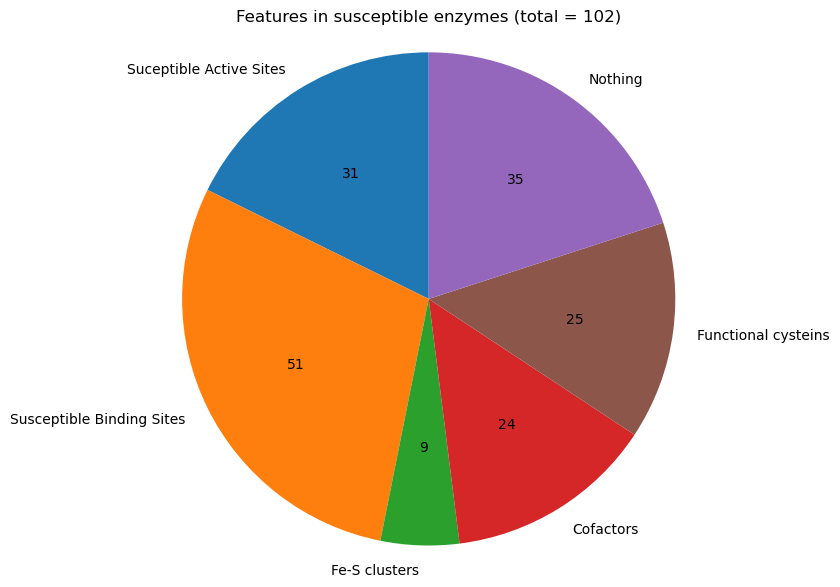

In [92]:
title = 'Features in susceptible enzymes'
plot_features(features_dict, ros_susceptibles.shape[0], title)


### Dividing analysis by EC class

In [12]:
ec_dict = {
    '1':'Oxidoreductases',
    '2':'Transferases',
    '3':'Hydrolases',
    '4':'Lyases',
    '5':'Isomerases',
    '6':'Ligases',
    '7':'Translocases'
}

# To store ecs
putida_term_dict = {
    'Oxidoreductases':[],
    'Transferases':[],
    'Hydrolases':[],
    'Lyases':[],
    'Isomerases':[],
    'Ligases':[],
    'Translocases':[]
}

# To store uniprot IDs
putida_uniprot_dict = {
    'Oxidoreductases':[],
    'Transferases':[],
    'Hydrolases':[],
    'Lyases':[],
    'Isomerases':[],
    'Ligases':[],
    'Translocases':[],
    'Unknown': []
}


In [13]:
# Divide enzymes according to their EC
# There are many IDs that do not have associated EC (coming from literature), so their name is retrieved

uniprot_ids = ros_table["UniProt ID"].tolist()   # Susceptible enzymes according to literature and BRENDA

cn = 0
cn2 = 0 
for uniprot in uniprot_ids:
    ec = UP_EC[uniprot]
    cn2 += 1
    s = False # Check starting
    for n in list(ec_dict.keys()):
        if ec.startswith(n):
            term = ec_dict[n]
            putida_term_dict[term].append(ec)
            putida_uniprot_dict[term].append(uniprot)
            cn += 1
            s = True 
    
    if not s: # No associated EC
        putida_uniprot_dict['Unknown'].append(uniprot)


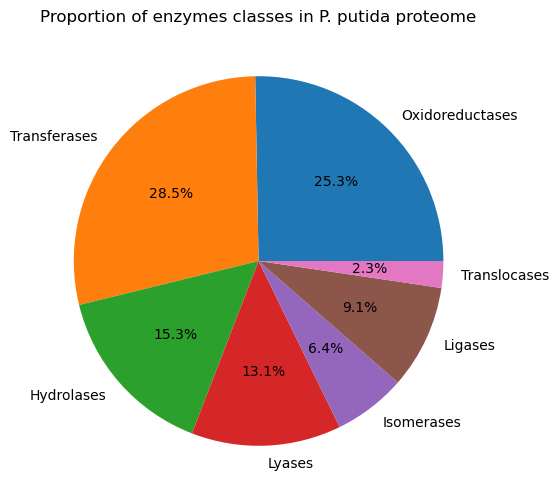

In [14]:
labels = list(putida_term_dict.keys())

sizes = [len(v) for v in putida_term_dict.values()]

# Dibujar el pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Proportion of enzymes classes in P. putida proteome")
plt.savefig("EC_classes_alldata.svg", bbox_inches="tight")
plt.show()

__Upset representation__

In [18]:
upset_data = boolean_matrix(ros_table)

<Figure size 1000x600 with 0 Axes>

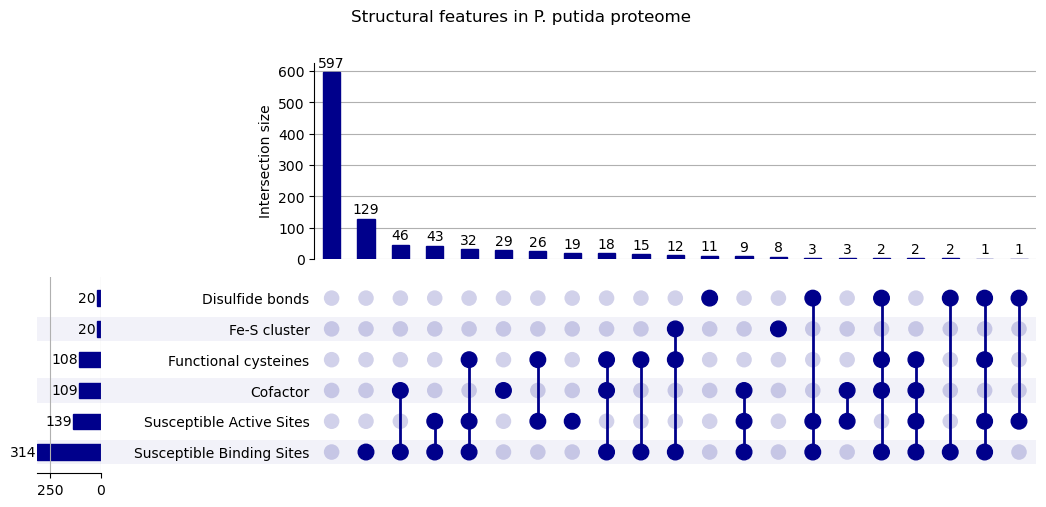

In [20]:
from upsetplot import UpSet
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

UpSet(
    upset_data,
    show_counts=True,
    sort_by="cardinality",
    facecolor="darkblue"
).plot()

plt.suptitle("Structural features in P. putida proteome")

plt.savefig("full_upset_plot.svg", bbox_inches="tight")

plt.show()

__Explore features for each subgroup__

In [82]:
print(len(UP_EC))
print(ros_table.shape)

1005
(1008, 20)


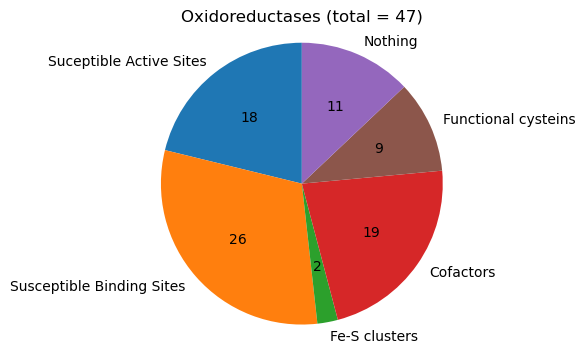

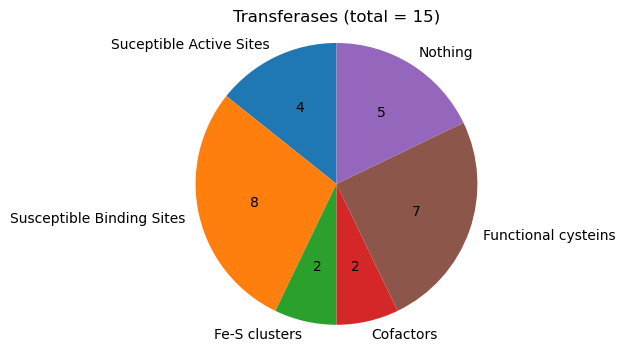

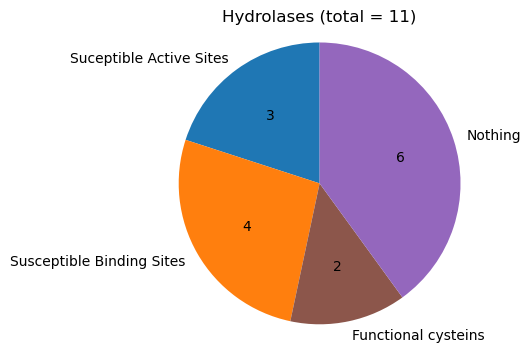

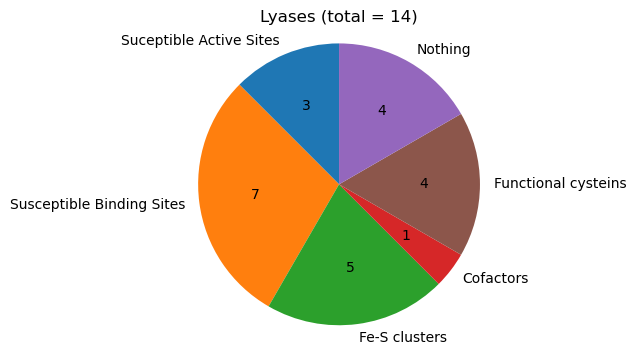

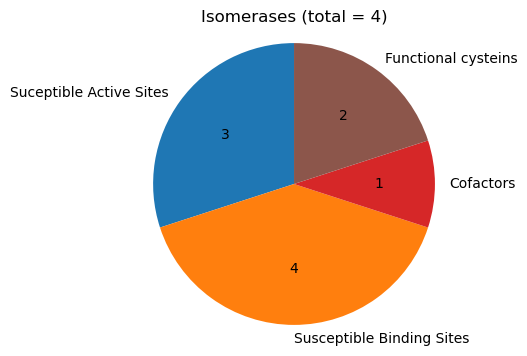

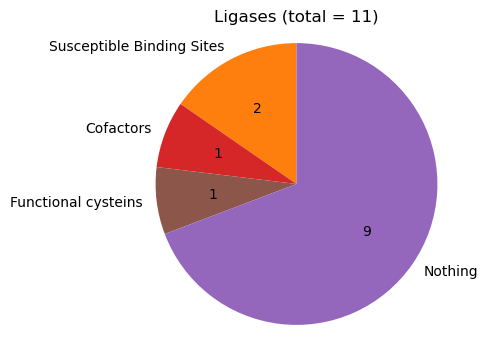

In [96]:
# Lets visualize the number of each structural feature in each EC type for ROS data
for term, uniprots in putida_uniprot_dict.items():
    if uniprots:
        sset = ros_susceptibles[ros_susceptibles["UniProt ID"].isin(uniprots)] # Filter data to EC type
        features_dict = get_features_num(sset)  # Get structural features count
        plot_features(features_dict, sset.shape[0], term, figsize=(4,4))

### Dividing analysis by structural features

In [8]:
ros_no_susceptibles = ros_table[ros_table["Evidence"].isna()]
ros_no_susceptibles.shape

(906, 20)

In [9]:
susc_features_dict = get_features_num(ros_susceptibles, normalize = True)
nosusc_features_dict = get_features_num(ros_no_susceptibles, normalize = True)
print(susc_features_dict)
print(nosusc_features_dict)

{'Suceptible Active Sites': 0.30392156862745096, 'Susceptible Binding Sites': 0.5, 'Fe-S clusters': 0.08823529411764706, 'Cofactors': 0.23529411764705882, 'Functional cysteins': 0.24509803921568626, 'Nothing': 0.3431372549019608}
{'Suceptible Active Sites': 0.11920529801324503, 'Susceptible Binding Sites': 0.2902869757174393, 'Fe-S clusters': 0.012141280353200883, 'Cofactors': 0.09381898454746136, 'Functional cysteins': 0.09161147902869757, 'Nothing': 0.6324503311258278}


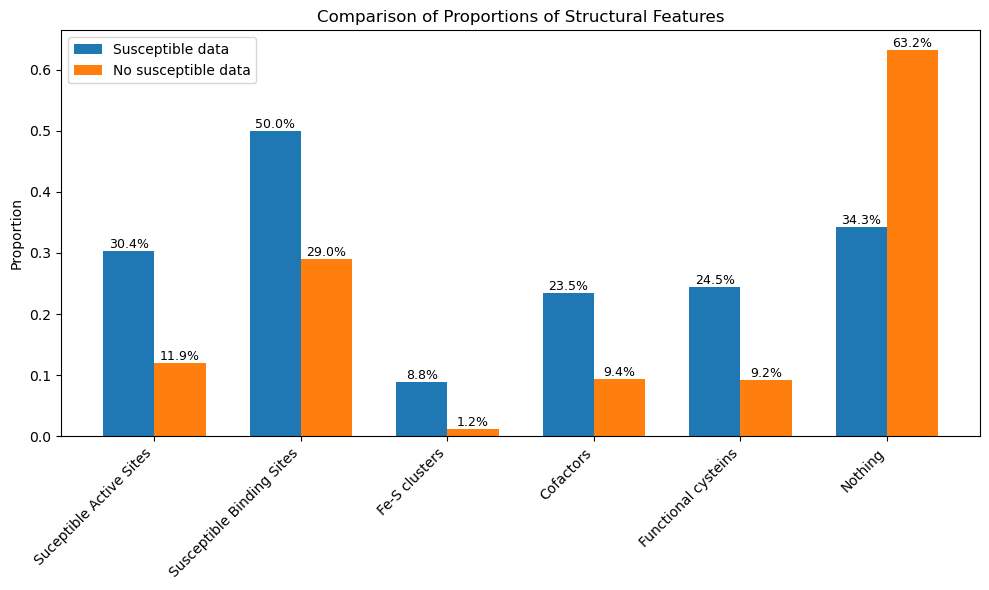

In [103]:
# Graph the relative proportions in each dataset
plot_sf_relative_proportions(susc_features_dict, nosusc_features_dict)

### Dividing analysis by class

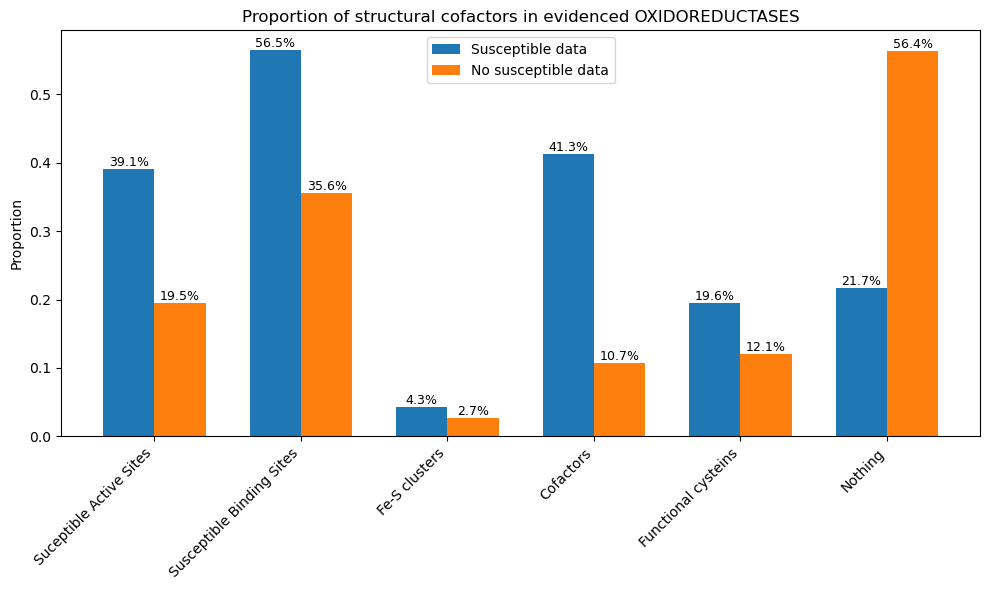

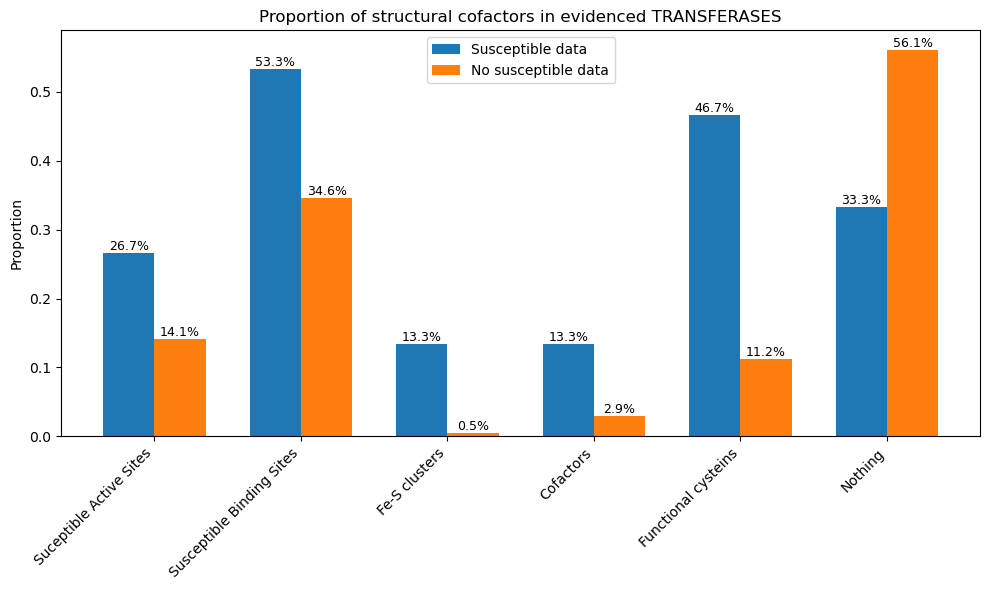

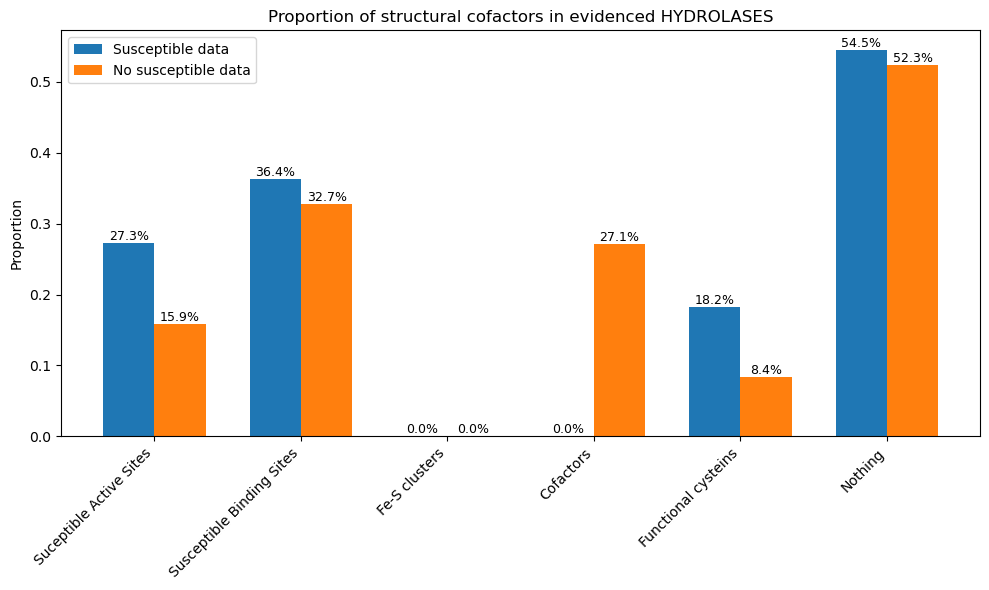

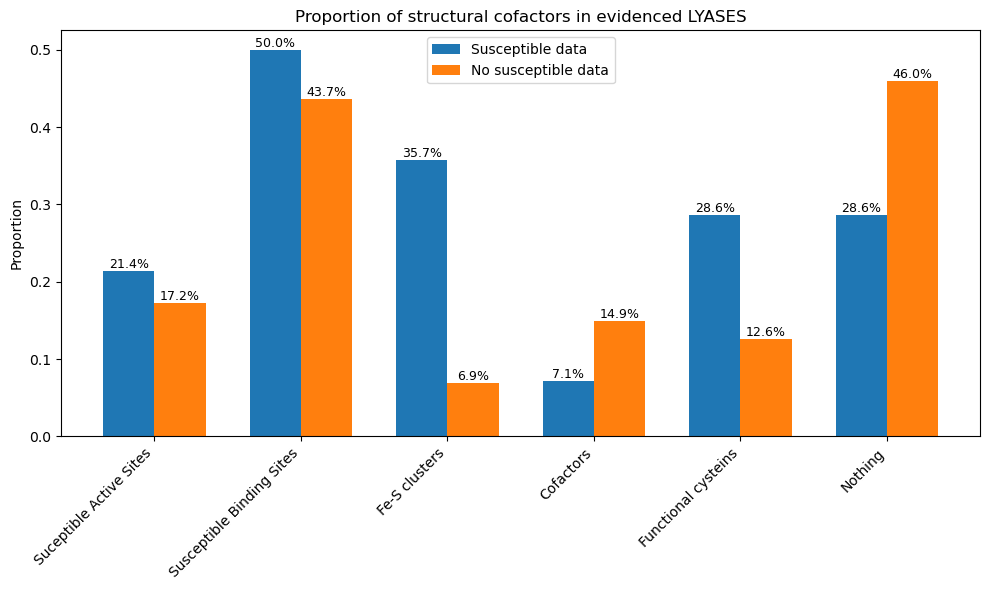

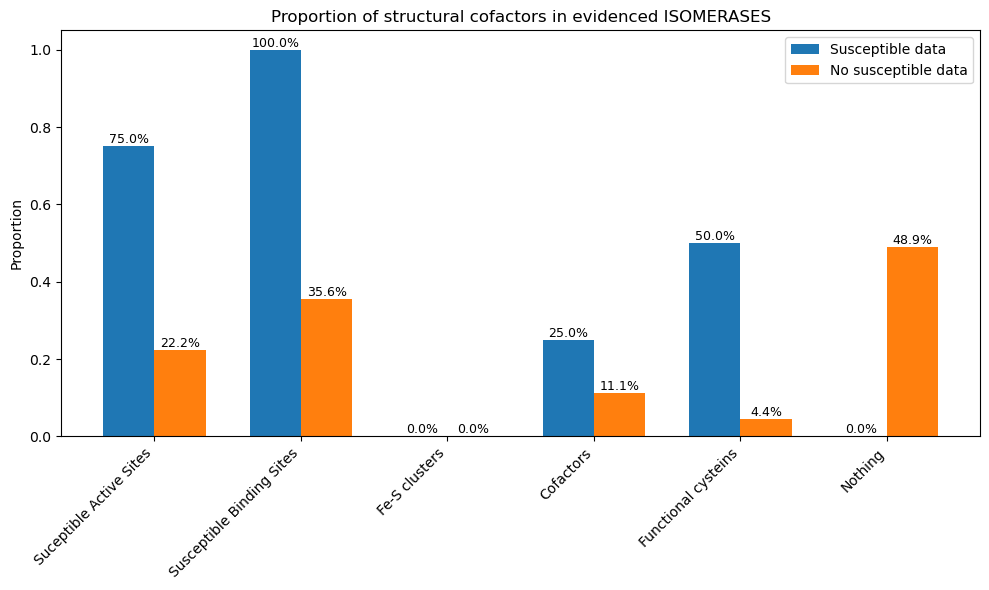

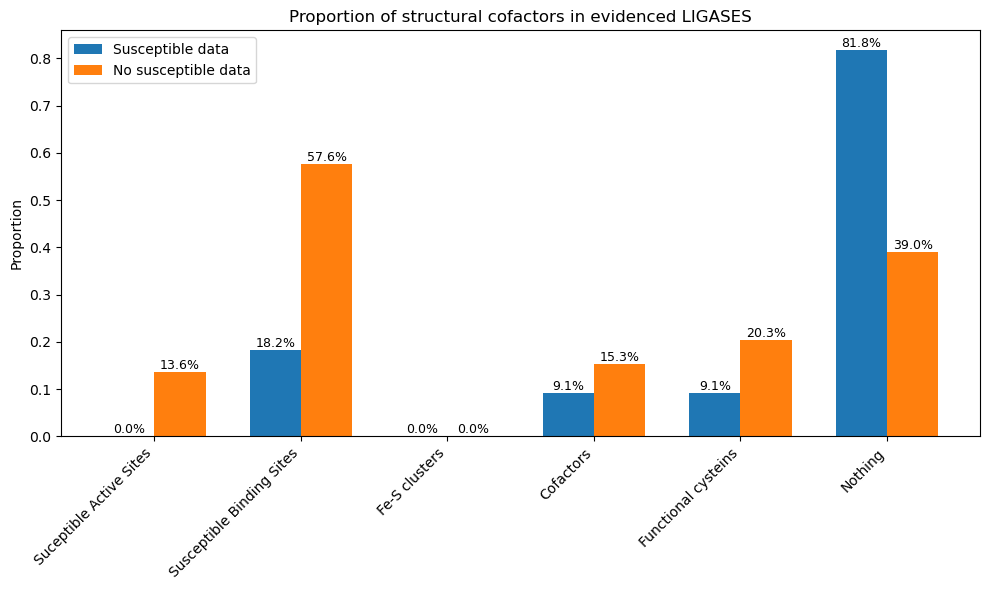

In [105]:
for term in putida_term_dict.keys():
    ros_susceptibles_sset = ros_susceptibles[ros_susceptibles["EC class"] == term]
    ros_no_susceptibles_sset = ros_no_susceptibles[ros_no_susceptibles["EC class"] == term]
    
    susc_features_dict = get_features_num(ros_susceptibles_sset, normalize = True)
    nosusc_features_dict = get_features_num(ros_no_susceptibles_sset, normalize = True)
    
    if susc_features_dict and nosusc_features_dict:
        t = f'Proportion of structural features in {term.upper()}'
        plot_sf_relative_proportions(susc_features_dict, nosusc_features_dict, title=t)

## Analysis with data specifically evidenced in P.putida

In [19]:
# Manually curated data is found in file "Pputida_evidenced.txt"
pputida_evidenced = pd.read_csv('Pputida_evidenced.txt', sep = '\t', encoding = 'latin1')
pputida_evidenced.head()

,KEGG ID,UniProt ID,Gene,Protein,# SR in AS,Mean SR - AS minimum distance,cys in AS,# SR in BS,Mean SR - BS minimum distance,cys in BS,# Disulfide bonds,Mean S-S - AS/BS minimum distance,Cofactor,Subsystem,Evidence,Study organism,ecNumber,EC class,BRENDA evidence,BRENDA organism
0,PP_0732,Q88PW6,hemA,Glutamyl-tRNA reductase,1,3.83,1,6,4.85,1,0,0.0,NaN,S_Cofactor_and_Prosthetic_Group_Biosynthesis__...,BRENDA,NaN,1.2.1.70,Oxidoreductases,suggesting that cysteine residues are the prim...,Acidithiobacillus ferrooxidans
1,PP_4715,Q88DV4,tpiA,Triosephosphate isomerase,1,4.37,0,1,5.10,0,0,0.0,NaN,S_Gluconeogenesis,BRENDA,NaN,5.3.1.1,Isomerases,oxidation of cystein residues,Arabidopsis thaliana AND Chlamydomonas reinhar...
2,PP_3668,Q88GQ0,katG,Catalase-peroxidase,1,3.86,0,2,5.24,0,0,0.0,heme b (C34H30FeN4O4),Unassigned,BRENDA,NaN,1.11.1.21,Oxidoreductases,"Steinman, H.M.; Fareed, F.; Weinstein, L.: Ca...",Archaeoglobus fulgidus AND Rhodobacter capsula...
3,PP_1001,Q88P52,arcA,Arginine deiminase,1,3.87,1,0,0.00,0,0,0.0,NaN,S_Arginine_and_Proline_Metabolism,BRENDA,NaN,3.5.3.6,Hydrolases,oxidation of cystein residues,Aspergillus nidulans
4,PP_0398,Q88QT9,glpE,Thiosulfate sulfurtransferase GlpE,1,3.85,1,0,0.00,0,0,0.0,NaN,S_Sulfur_Metabolism,BRENDA,NaN,2.8.1.1,Transferases,"In the absence of reduced thioredoxin, the sul...",Bos taurus


In [20]:
# Get number of features
pputida_fd = get_features_num(pputida_evidenced)
pputida_fd

{'Suceptible Active Sites': 21,
 'Susceptible Binding Sites': 26,
 'Fe-S clusters': 7,
 'Cofactors': 15,
 'Functional cysteins': 18,
 'Nothing': 1}

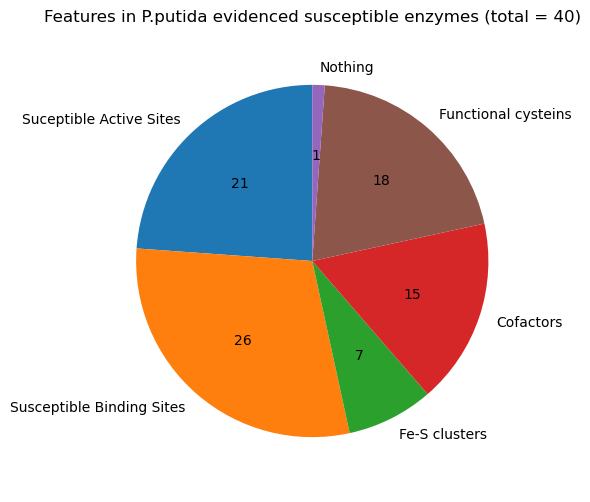

In [14]:
# Plot features
title = 'Features in P.putida evidenced susceptible enzymes'
plot_features(pputida_fd, pputida_evidenced.shape[0], title, figsize=(5,6))

Given that several enzymes simultaneously present multiple structural features, pie charts are not appropriate as they implicitly assume mutually exclusive categories. Therefore, feature overlap was visualized using UpSet diagrams

In [23]:
upset_data = boolean_matrix(pputida_evidenced)

<Figure size 1000x600 with 0 Axes>

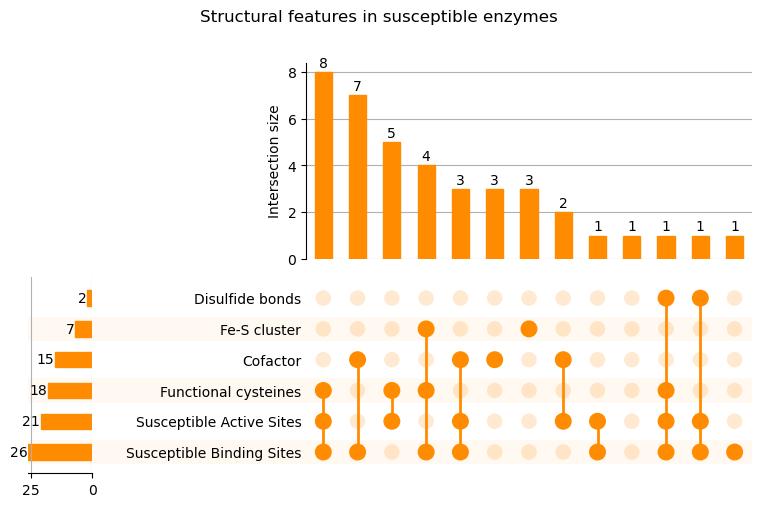

In [25]:
plt.figure(figsize=(10, 6))

UpSet(
    upset_data,
    show_counts=True,
    sort_by="cardinality",
    facecolor="darkorange"
).plot()

plt.suptitle("Structural features in susceptible enzymes")

plt.savefig("upset_plot.svg", bbox_inches="tight")

plt.show()



### Dividing analysis by EC class

In [23]:
PP_ec_dict = {
    '1':'Oxidoreductases',
    '2':'Transferases',
    '3':'Hydrolases',
    '4':'Lyases',
    '5':'Isomerases',
    '6':'Ligases',
    '7':'Translocases'
}

# To store ecs
PP_term_dict = {
    'Oxidoreductases':[],
    'Transferases':[],
    'Hydrolases':[],
    'Lyases':[],
    'Isomerases':[],
    'Ligases':[],
    'Translocases':[]  
}

# To store uniprot IDs
PP_uniprot_dict = {
    'Oxidoreductases':[],
    'Transferases':[],
    'Hydrolases':[],
    'Lyases':[],
    'Isomerases':[],
    'Ligases':[],
    'Translocases':[]  
}


In [71]:
ec_list = pputida_evidenced["ecNumber"].tolist()

for n in PP_ec_dict.keys():
    for ec in ec_list:
        if ec.startswith(n):
            term = PP_ec_dict[n]
            PP_term_dict[term].append(ec)
            uniprot = pputida_evidenced.loc[pputida_evidenced["ecNumber"] == ec, "UniProt ID"].iloc[0]
            PP_uniprot_dict[term].append(uniprot)

In [72]:
print(PP_term_dict)
print(PP_uniprot_dict)

{'Oxidoreductases': ['1.2.1.70', '1.11.1.21', '1.11.1.6', '1.11.1.6', '1.3.98.3', '1.13.11.1', '1.13.11.1', '1.13.11.57', '1.13.11.9', '1.2.1.46', '1.13.11.27', '1.8.1.4', '1.8.1.4', '1.1.1.42', '1.1.1.42', '1.15.1.1', '1.15.1.1', '1.13.11.2', '1.2.1.8', '1.1.1.40', '1.2.1.-', '1.11.1.9', '1.11.1.9', '1.11.1.9'], 'Transferases': ['2.8.1.1', '2.5.1.72', '2.7.9.3', '2.1.1.45'], 'Hydrolases': ['3.5.3.6'], 'Lyases': ['4.2.1.12', '4.4.1.11', '4.2.1.3', '4.2.1.3', '4.2.1.3', '4.1.3.1', '4.2.1.2'], 'Isomerases': ['5.3.1.1', '5.2.1.1', '5.1.3.1', '5.1.1.7'], 'Ligases': [], 'Translocases': []}
{'Oxidoreductases': ['Q88PW6', 'Q88GQ0', 'Q88RL4', 'Q88RL4', 'Q88F35', 'Q88GK8', 'Q88GK8', 'Q88JX5', 'Q88FY1', 'Q88R06', 'Q88HC7', 'Q88FB1', 'Q88FB1', 'Q88FS2', 'Q88FS2', 'Q88PD5', 'Q88PD5', 'P06622', 'Q88CW7', 'Q88CU5', 'Q88P44', 'Q88LQ5', 'Q88LQ5', 'Q88LQ5'], 'Transferases': ['Q88QT9', 'Q88NH8', 'P59392', 'Q88CN9'], 'Hydrolases': ['Q88P52'], 'Lyases': ['Q88P43', 'Q88NA4', 'Q88L24', 'Q88L24', 'Q88L24', '

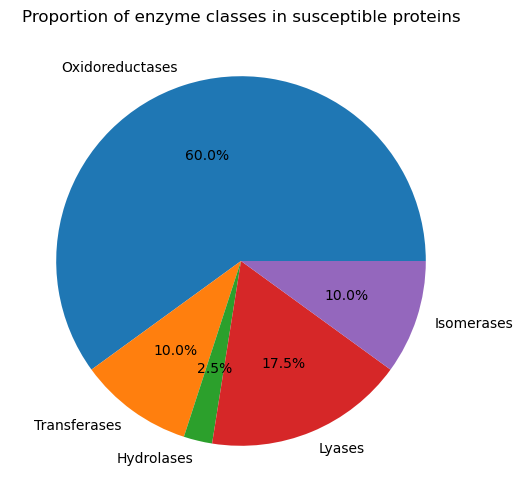

In [95]:
labels = []
sizes = []

for k, v in PP_term_dict.items():
    if len(v) > 0:
        labels.append(k)
        sizes.append(len(v))

# Dibujar el pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Proportion of enzyme classes in susceptible proteins")
plt.savefig("Evidenced_susceptible_EC.svg", bbox_inches="tight")
plt.show()

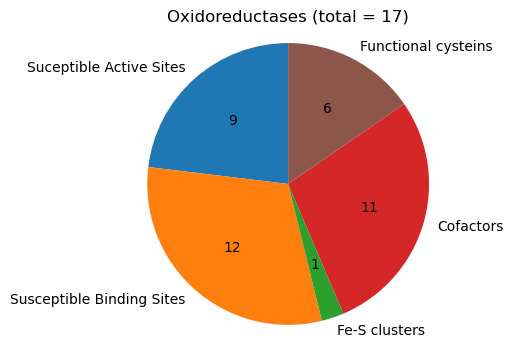

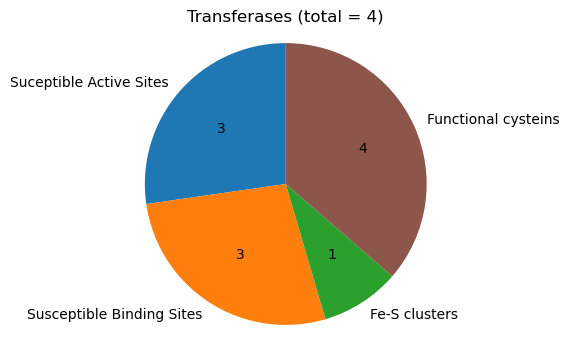

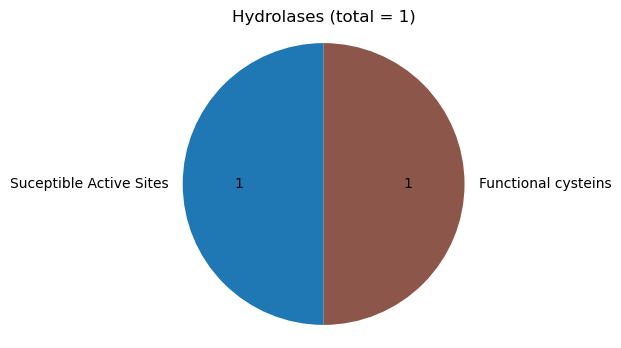

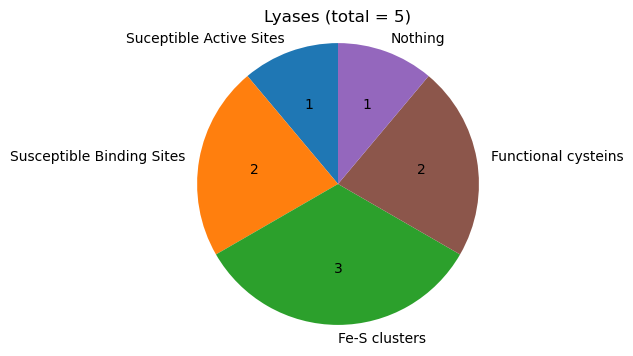

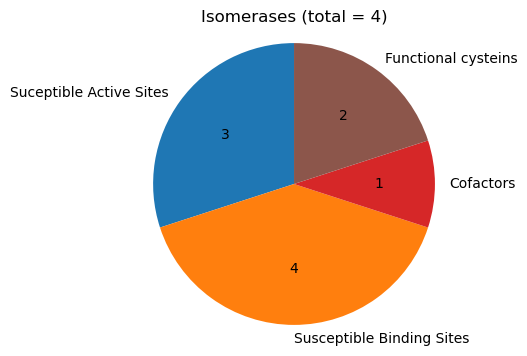

In [114]:
# Lets visualize the number of each structural feature in each EC type for Pputida evidenced data
for term, uniprots in PP_uniprot_dict.items():
    if uniprots:
        sset = pputida_evidenced[pputida_evidenced["UniProt ID"].isin(uniprots)]
        features_dict = get_features_num(sset)  
        plot_features(features_dict, sset.shape[0], term, figsize=(4,4))

### Dividing analysis by structural features

In [21]:
# Generate "no-evidenced in P.putida" dataframe
no_pputida_evidenced = ros_table[~ros_table["UniProt ID"].isin(pputida_evidenced["UniProt ID"])]
print(no_pputida_evidenced.shape)

(968, 20)


In [100]:
# Get structural features number for each dataset
PP_susc_features_dict = get_features_num(pputida_evidenced, normalize = True)
PP_nosusc_features_dict = get_features_num(no_pputida_evidenced, normalize = True)
print(PP_susc_features_dict)
print(PP_nosusc_features_dict)

{'Suceptible Active Sites': 0.525, 'Susceptible Binding Sites': 0.65, 'Fe-S clusters': 0.175, 'Cofactors': 0.375, 'Functional cysteins': 0.45, 'Nothing': 0.025}
{'Suceptible Active Sites': 0.12190082644628099, 'Susceptible Binding Sites': 0.2975206611570248, 'Fe-S clusters': 0.013429752066115703, 'Cofactors': 0.09710743801652892, 'Functional cysteins': 0.09297520661157024, 'Nothing': 0.6270661157024794}


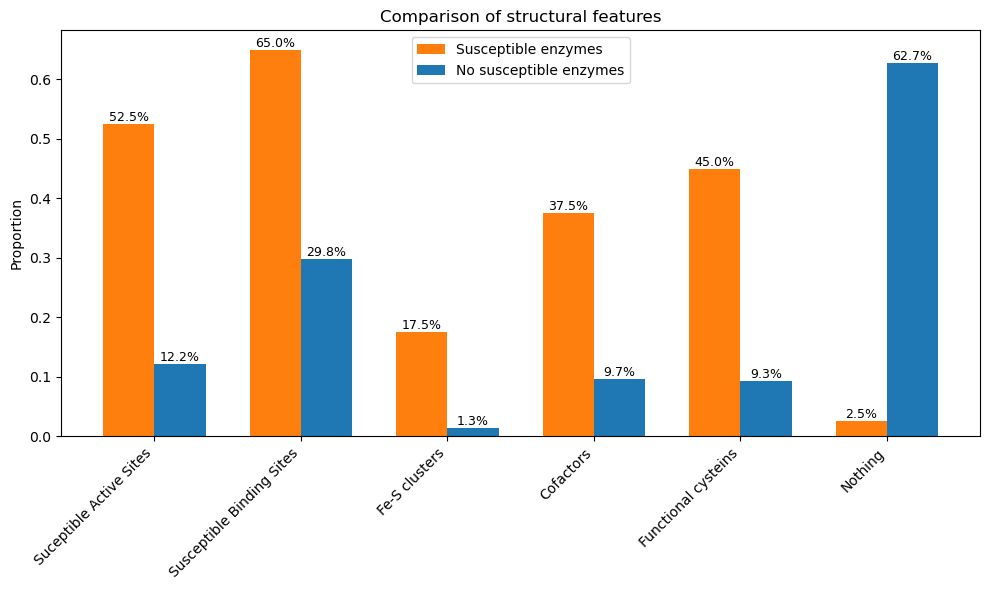

In [101]:
# Plot results
plot_sf_relative_proportions(PP_susc_features_dict, PP_nosusc_features_dict)

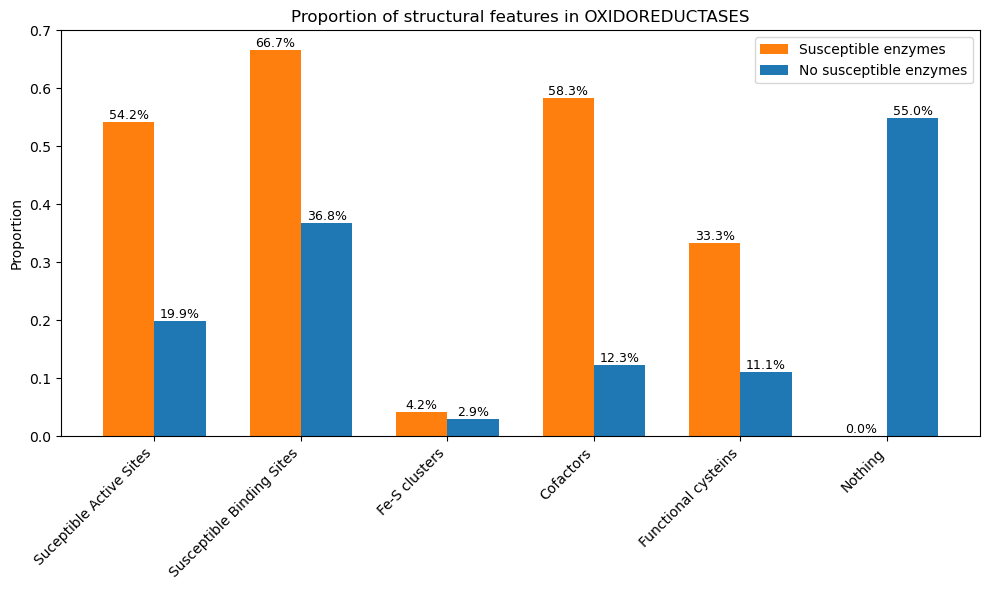

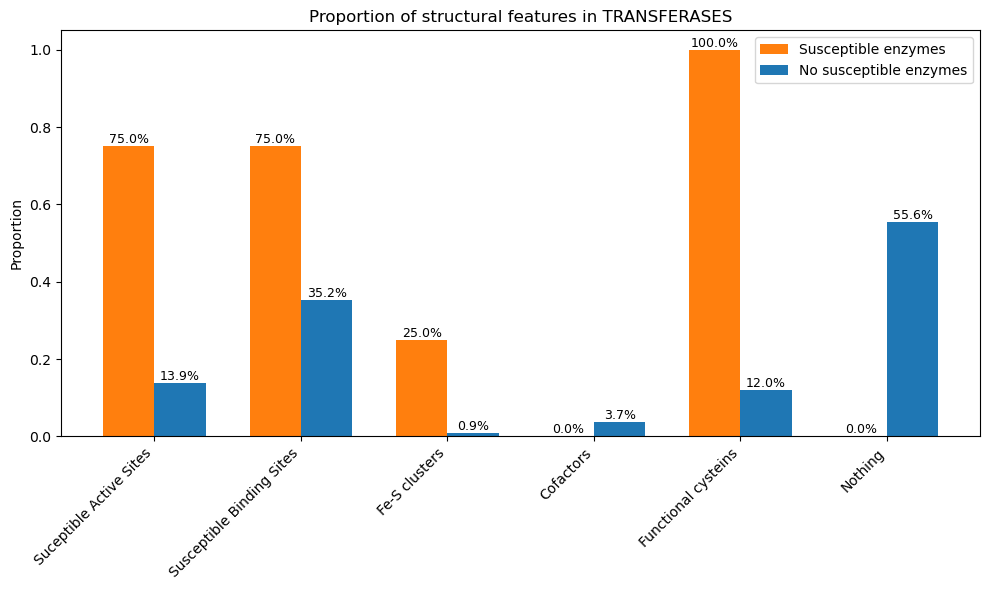

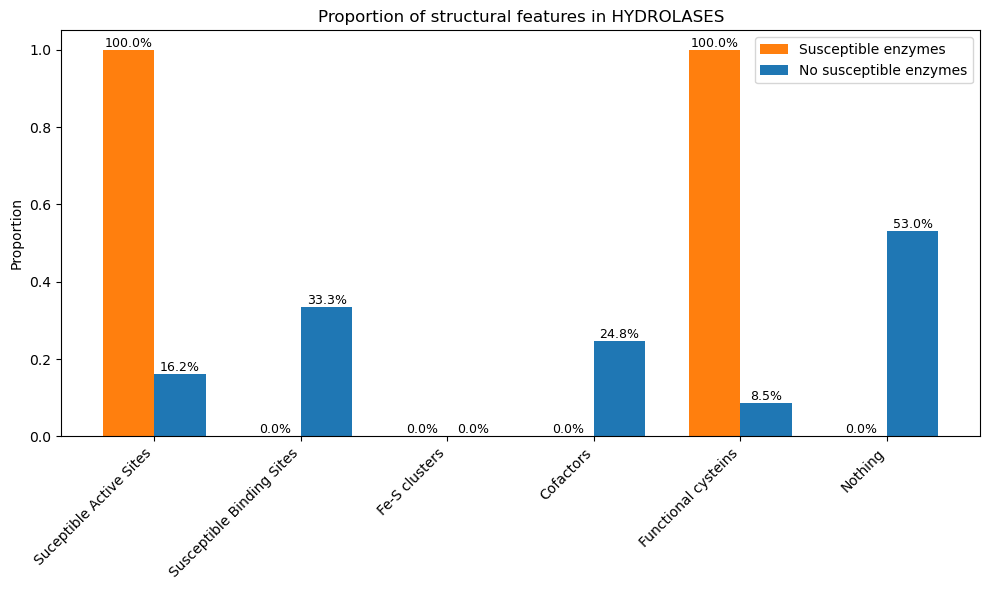

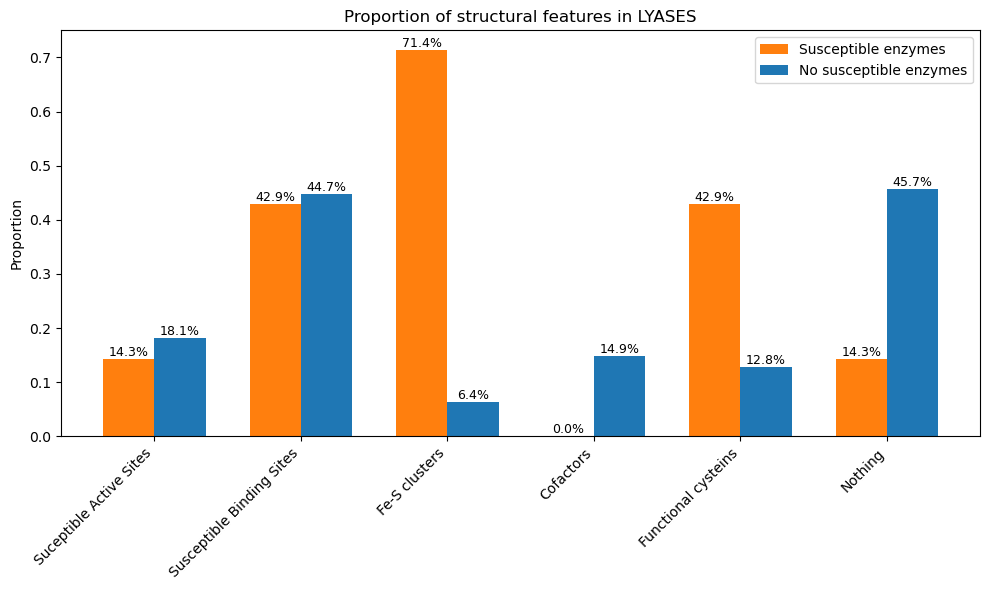

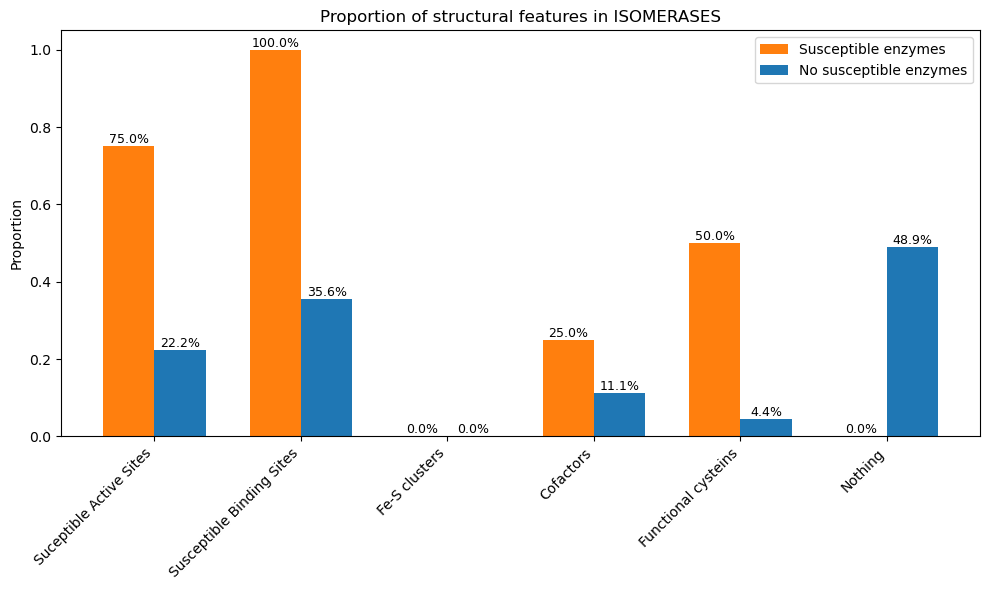

In [109]:
# Lets now divide the same analysis by enzyme class
for term in PP_term_dict.keys():
    pputida_evidenced_sset = pputida_evidenced[pputida_evidenced["EC class"] == term]
    pputida_no_evidenced_sset = no_pputida_evidenced[no_pputida_evidenced["EC class"] == term]
    
    susc_features_dict = get_features_num(pputida_evidenced_sset, normalize = True)
    nosusc_features_dict = get_features_num(pputida_no_evidenced_sset, normalize = True)
    
    if susc_features_dict and nosusc_features_dict:
        t = f'Proportion of structural features in {term.upper()}'
        plot_sf_relative_proportions(susc_features_dict, nosusc_features_dict, ec_class = term, title = t)

### Merge all data onto a heatmap

In [38]:
# Get structural factors
records = []
delta_df = {}

for term in PP_term_dict.keys():
    pputida_evidenced_sset = pputida_evidenced[pputida_evidenced["EC class"] == term]
    pputida_no_evidenced_sset = no_pputida_evidenced[no_pputida_evidenced["EC class"] == term]
    
    susc_features_dict = get_features_num(pputida_evidenced_sset, normalize = True)
    nosusc_features_dict = get_features_num(pputida_no_evidenced_sset, normalize = True)
    
    if susc_features_dict and nosusc_features_dict:
        delta_df[term] = {
            f: susc_features_dict[f] - nosusc_features_dict[f] for f in susc_features_dict.keys()
        }
    
    
    for feature in susc_features_dict.keys():
        records.append({
            "EC class": term,
            "Condition": "Evidenced",
            "Feature": feature,
            "Proportion": susc_features_dict[feature]
        })
        records.append({
            "EC class": term,
            "Condition": "No_evidenced",
            "Feature": feature,
            "Proportion": nosusc_features_dict[feature]
        })



In [29]:
df_long = pd.DataFrame(records)

heatmap_df = df_long.pivot_table(
    index="Feature",
    columns=["EC class", "Condition"],
    values="Proportion"
)

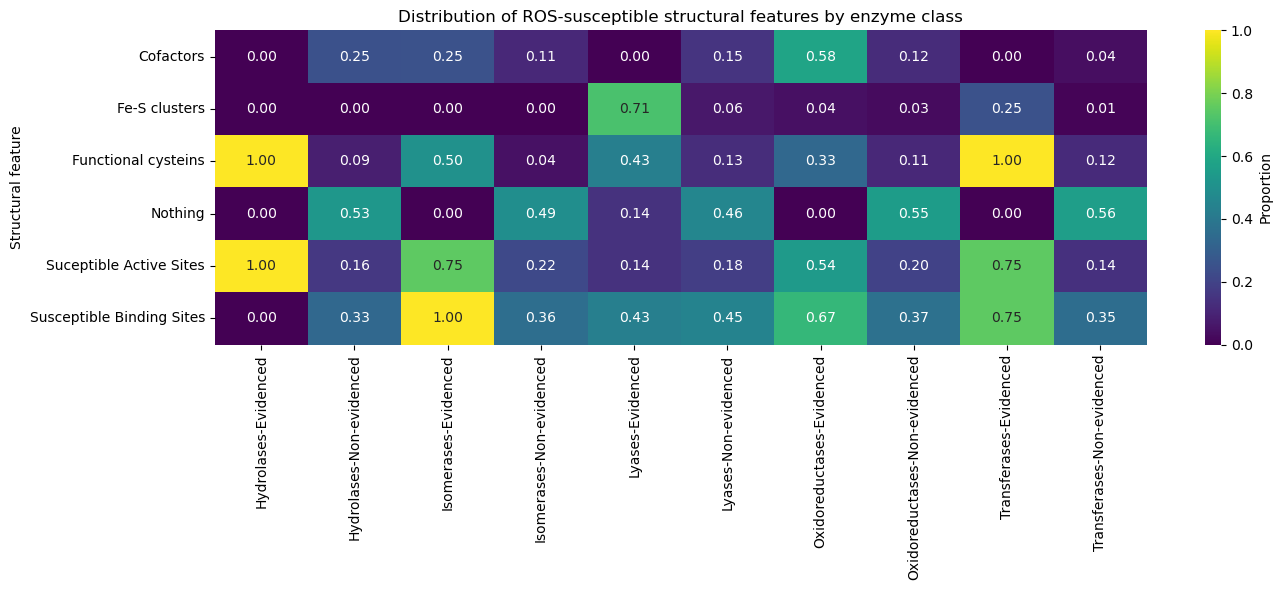

In [30]:
import seaborn as sns

plt.figure(figsize=(14, 6))

sns.heatmap(
    heatmap_df,
    cmap="viridis",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Proportion"}
)

plt.title("Distribution of ROS-susceptible structural features by enzyme class")
plt.ylabel("Structural feature")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [39]:
# Enrichment heatmap
delta_df = pd.DataFrame(delta_df)
delta_df.head()

,Oxidoreductases,Transferases,Hydrolases,Lyases,Isomerases
Suceptible Active Sites,0.342836,0.611111,0.837607,-0.037994,0.527778
Susceptible Binding Sites,0.298246,0.398148,-0.333333,-0.018237,0.644444
Fe-S clusters,0.012427,0.240741,0.000000,0.650456,0.000000
Cofactors,0.460526,-0.037037,-0.247863,-0.148936,0.138889
Functional cysteins,0.222222,0.879630,0.914530,0.300912,0.455556


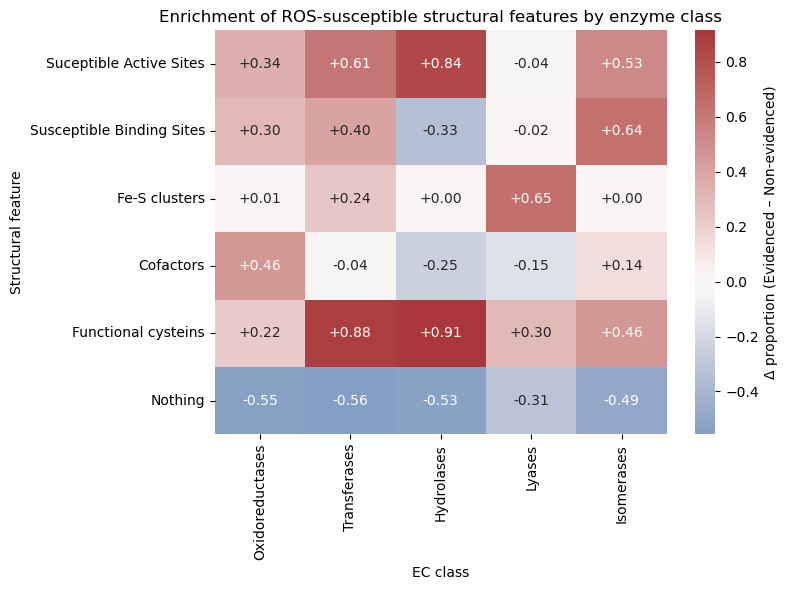

In [53]:
plt.figure(figsize=(8,6))

sns.heatmap(
    delta_df,
    cmap="vlag",
    center=0,
    annot=True,
    fmt="+.2f",
    cbar_kws={"label": "Δ proportion (Evidenced – Non-evidenced)"}
)


plt.title("Enrichment of ROS-susceptible structural features by enzyme class")
plt.ylabel("Structural feature")
plt.xlabel("EC class")
plt.tight_layout()

plt.savefig("heatmap_ros_features.svg", format="svg")

plt.show()

# Generate output table with new BRENDA info

### Susceptibles

In [31]:
# Susceptible enzymes subset --> ros_susceptibles (length = 103)
# Assosciation UniPrto - EC --> UP_EC
# Type of enzyme --> putida_uniprot_dict

# Create empty columns
ros_susceptibles["ecNumber"] = ''
ros_susceptibles["EC class"] = ''

# Add EC numbers
ros_susceptibles["ecNumber"] = ros_susceptibles["UniProt ID"].map(UP_EC)

C:\Users\JorgeXD\AppData\Local\Temp\ipykernel_14704\3193213432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ros_susceptibles["ecNumber"] = ''
C:\Users\JorgeXD\AppData\Local\Temp\ipykernel_14704\3193213432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ros_susceptibles["EC class"] = ''
C:\Users\JorgeXD\AppData\Local\Temp\ipykernel_14704\3193213432.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [32]:
# Add EC class
for term, uniprots in putida_uniprot_dict.items():
    for uniprot in uniprots:
        ros_susceptibles.loc[ros_susceptibles["UniProt ID"] == uniprot, 'EC class'] = term
        

In [73]:
ros_susceptibles.head()

,KEGG ID,UniProt ID,Gene,Protein,# SR in AS,Mean SR - AS minimum distance,cys in AS,# SR in BS,Mean SR - BS minimum distance,cys in BS,# Disulfide bonds,Mean S-S - AS/BS minimum distance,Cofactor,Subsystem,Evidence,Study organism,ecNumber,EC class,BRENDA evidence,BRENDA organism
7,PP_0072,Q88RQ7,qor-I,NADPH:quinone reductase,0,0.00,0,0,0.00,0,0,0.0,NaN,Unassigned,BRENDA,NaN,1.6.5.5,Oxidoreductases,"Huang, Q.L.; Du, X.Y.; Stone, S.H.; Amsbaugh,...",Cavia porcellus
13,PP_0115,Q88RL4,katE,Catalase,1,5.35,0,5,4.53,0,0,0.0,heme (Fe_heme),Unassigned,Catalase can be directly inactivated by ROS (D...,Many,1.11.1.6,Oxidoreductases,"Amo, T.; Atomi, H.; Imanaka, T.: Unique prese...",Brassica oleracea AND Kloeckera sp. AND Rhodob...
40,PP_0243,Q88R90,gshA,Glutamate--cysteine ligase,0,0.00,0,0,0.00,0,0,0.0,NaN,S_Glutamate_Metabolism,Reduction of disulfide bonds lead to the inact...,Arabidopsis Thaliana,6.3.2.2,Ligases,NaN,NaN
57,PP_0328,Q88R06,fdhA,Formaldehyde dehydrogenase,0,0.00,0,0,0.00,0,0,0.0,Zn(2+) (Zn),S_Formaldehyde_Metabolism,BRENDA,NaN,1.2.1.46,Oxidoreductases,"Ogushi, S.; Ando, M.; Tsuru, D.: Formaldehyde...",Pseudomonas putida AND Homo sapiens AND Mus mu...
67,PP_0362,Q88QX2,bioB,Biotin synthase,0,0.00,0,7,4.32,6,0,0.0,[4Fe-4S] cluster (Fe4S4) AND [2Fe-2S] cluster ...,S_Cofactor_and_Prosthetic_Group_Biosynthesis__...,Biotin synthase (BioB) is susceptible to degra...,NaN,2.8.1.6,Transferases,NaN,NaN


In [74]:
# Save the file 
filename = 'ROS_evidenced_updated.tsv'
ros_susceptibles.to_csv(filename, index=False, sep='\t')

__Get the name of the enzymes which are affected by ROS and do not have any structural feature__

In [10]:
nothing_sset = ros_susceptibles[(ros_susceptibles["# SR in AS"] == 0) &
                                (ros_susceptibles["# SR in BS"] == 0) &
                                (ros_susceptibles["Cofactor"].isna())]

nothing_names = set(nothing_sset["Protein"].tolist())
for nn in nothing_names:
    print(nn)
    
print(len(nothing_names))

Glutamine synthetase
Histidine ammonia-lyase
NAD-specific glutamate dehydrogenase
3-mercaptopyruvate sulfurtransferase
Phosphoglycolate phosphatase
Glutamate-putrescine ligase
GTP cyclohydrolase 1 1
Glutamylpolyamine synthetase
Lipase
2-oxoglutarate dehydrogenase E1 component
Glutamate--cysteine ligase
Cystathionine gamma-synthase
Quinone oxidoreductase
Cytosine deaminase / isoguanine deaminase
Phospho-2-dehydro-3-deoxyheptonate aldolase
GTP cyclohydrolase 1 2
Glyceraldehyde-3-phosphate dehydrogenase
Glutamate--tRNA ligase
Indole-3-glycerol phosphate synthase
Allantoinase
Thioredoxin
NADPH:quinone reductase
UTP--glucose-1-phosphate uridylyltransferase
aldehyde dehydrogenase (NAD(+))
methylmalonate-semialdehyde dehydrogenase (CoA acylating)
Sulfurtransferase
L-methionine gamma-lyase
27


### Original data

In [72]:
# Extracting a subset of the data: get all enzymes with BRENDA evidence and incorporate information into the table
# ecNumbers --> UP_EC
# Enzyme class --> ec_dict
ec_dict = {
    '1':'Oxidoreductases',
    '2':'Transferases',
    '3':'Hydrolases',
    '4':'Lyases',
    '5':'Isomerases',
    '6':'Ligases',
    '7':'Translocases'
}

# Read table
ros_table = pd.read_csv('ROS_full_table.tsv', sep = '\t', encoding='latin1')

ros_table["ecNumber"] = ''
ros_table["EC class"] = ''
ros_table["BRENDA evidence"] = ''
ros_table["BRENDA organism"] = ''

In [73]:
# Add EC numbers
ros_table["ecNumber"] = ros_table["UniProt ID"].map(UP_EC)

In [74]:
# Add EC class
ecnums = set(ros_table['ecNumber'].tolist())

for ec in ecnums:
    if not ec:
        ros_table.loc[ros_table["ecNumber"] == ec, "EC class"] = 'Unk'
    for num, term in ec_dict.items():
        if ec.startswith(num):
            ros_table.loc[ros_table["ecNumber"] == ec, "EC class"] = term
            break

In [75]:
# Add "BRENDA" to column "EVIDENCE"
# Rows from the subset
mask = ros_table["UniProt ID"].isin(ros_sset["UniProt ID"])

# If any value, concatenate using ;
ros_table.loc[mask & ros_table["Evidence"].notna(), "Evidence"] = (
    ros_table.loc[mask & ros_table["Evidence"].notna(), "Evidence"] + " ; BRENDA"
)

# Only assign if the column Evidence is empty
ros_table.loc[mask & ros_table["Evidence"].isna(), "Evidence"] = "BRENDA"

In [76]:
# Retrieve reference and organism information for each enzyme and add it to the final table
# Species works well
# But Reference information is often ommited in the plain text while maintained in the web page 
# It will require manual seach if needed

ihbs = ['H2O2', 'superoxide']
for enz in all_enz:
    try:  # Search reaction in BRENDA
        rxn = brenda.reactions.get_by_id(enz)
    except:
        print(f'Enzyme {enz} not found in BRENDA')
        continue
        
    ihb = rxn.inhibitors
    h2o2_refs_list = []
    h2o2_spec_list = []
        
    for i in ihbs:
        try:  # Find inhibition
            ros_ihb = ihb[i]
            h2o2_refs_list.extend(ros_ihb["refs"])
            h2o2_spec_list.extend(ros_ihb["species"])
        except:
            continue
             
    if h2o2_refs_list:
            ros_ihb_refs = ' AND '.join(h2o2_refs_list)
            ros_table.loc[ros_table["ecNumber"] == enz, "BRENDA evidence"] = ros_ihb_refs
    if h2o2_spec_list:
            ros_ihb_species = ' AND '.join(h2o2_spec_list)
            ros_table.loc[ros_table["ecNumber"] == enz, "BRENDA organism"] = ros_ihb_species   

Enzyme 3.1.3.B4 not found in BRENDA
Enzyme 3.1.5.B1 not found in BRENDA
Enzyme 1.11.1.B2 not found in BRENDA
Enzyme 1.14.99.B10 not found in BRENDA


In [77]:
b = ros_table[ros_table["BRENDA evidence"] != '']
print(b.shape)
s = ros_table[ros_table["BRENDA organism"] != '']
print(s.shape)

(16, 18)
(84, 18)


In [78]:
# Store table
ros_table.to_csv('ROS_full_updated_BRENDA.tsv', sep = '\t', index = False)

__Extract table with evidenced data WITHOUT structural features__

In [40]:
ros_updated = pd.read_csv('ROS_nothing_updated.tsv.txt', sep = '\t')
ros_updated.head()

,KEGG ID,UniProt ID,Gene,Protein,# SR in AS,Mean SR - AS minimum distance,# SR in BS,Mean SR - BS minimum distance,# Disulfide bonds,Mean S-S - AS/BS minimum distance,Cofactor,Subsystem,Evidence,Study organism,ecNumber,EC class,BRENDA evidence,BRENDA organism,Other evidence
0,PP_0665,Q88Q33,NaN,Glyceraldehyde-3-phosphate dehydrogenase,0,0.0,0,0.0,0,0.0,NaN,S_Gluconeogenesis,Glyceraldehyde-3-phosphate dehydrogenase under...,Human,1.2.1.-,Oxidoreductases,72% residual activity at 1 mM H2O2: Our result...,NaN,Oxidatively modified GAPDH (cystein residues a...
1,PP_2149,Q88KZ0,gapB,Glyceraldehyde-3-phosphate dehydrogenase,0,0.0,0,0.0,0,0.0,NaN,S_Gluconeogenesis,Glyceraldehyde-3-phosphate dehydrogenase under...,Human,1.2.1.-,Oxidoreductases,72% residual activity at 1 mM H2O2: Our result...,NaN,Oxidatively modified GAPDH (cystein residues a...
2,PP_3443,Q88HB7,NaN,Glyceraldehyde-3-phosphate dehydrogenase,0,0.0,0,0.0,0,0.0,NaN,S_Gluconeogenesis,Glyceraldehyde-3-phosphate dehydrogenase under...,Human,1.2.1.-,Oxidoreductases,72% residual activity at 1 mM H2O2: Our result...,NaN,Oxidatively modified GAPDH (cystein residues a...
3,PP_0597,Q88Q97,mmsA-I,methylmalonate-semialdehyde dehydrogenase (CoA...,0,0.0,0,0.0,0,0.0,NaN,S_Alternate_Carbon_and_Nitrogen_source__Dipept...,BRENDA,NaN,1.2.1.27,Oxidoreductases,about 40% inhibition at 3 mM,Pyricularia oryzae,NaN
4,PP_4667,Q88E01,mmsA-II,methylmalonate-semialdehyde dehydrogenase (CoA...,0,0.0,0,0.0,0,0.0,NaN,S_Valine__Leucine__and_Isoleucine_Metabolism,BRENDA,NaN,1.2.1.27,Oxidoreductases,about 40% inhibition at 3 mM,Pyricularia oryzae,NaN


In [41]:
nothing_uniprot_ids = nothing_sset["UniProt ID"].tolist()
nothing_updated = ros_updated[ros_updated["UniProt ID"].isin(nothing_uniprot_ids)]
nothing_updated.shape

(35, 19)

In [43]:
filename = 'ROS_nothing_updated.tsv'
nothing_updated.to_csv(filename, sep = '\t', index = False)

In [27]:
print(all_enz)

{'1.10.3.3', '1.13.11.47', '1.14.16.5', '1.6.5.5', '1.13.11.15', '1.7.2.8', '3.5.3.6', '1.13.11.27', '3.2.1.4', '1.13.11.9', '1.2.4.2', '3.2.1.2', '1.1.3.10', '1.14.13.62', '1.11.1.14', '1.11.2.4', '2.5.1.54', '1.4.3.22', '6.3.5.5', '1.1.3.4', '6.1.1.17', '1.1.1.363', '1.13.11.4', '1.2.1.12', '1.14.11.2', '4.2.1.2', '1.14.11.29', '1.3.2.3', '1.14.14.173', '2.3.3.5', '1.13.11.76', '2.7.4.21', '3.3.2.9', '6.3.1.2', '3.1.3.2', '3.1.4.4', '1.14.14.20', '4.1.1.39', '3.1.1.20', '3.1.2.1', '4.2.1.182', '3.4.23.47', '3.1.3.1', '3.1.3.67', '1.17.1.4', '1.13.11.39', '1.8.1.4', '2.1.1.45', '1.14.14.108', '2.3.1.5', '1.11.1.7', '3.1.3.18', '3.4.21.53', '6.1.1.3', '4.4.1.1', '3.6.1.6', '6.2.1.15', '2.3.1.21', '1.21.3.6', '1.17.4.1', '3.1.6.1', '1.13.99.1', '3.1.3.B4', '1.14.13.39', '1.1.1.1', '2.7.7.9', '7.2.1.1', '1.13.11.5', '1.14.19.26', '1.14.11.69', '1.14.19.22', '2.7.9.3', '3.4.22.40', '3.4.24.87', '3.5.1.88', '3.5.2.5', '1.11.1.24', '1.2.1.79', '3.4.24.28', '1.8.4.12', '4.4.1.11', '1.14.18.3

## Retrieve more BRENDA data : organism & evidence reference

In [28]:
print(dir(brenda))

['_BRENDA__copyright', '_BRENDA__ec_numbers', '_BRENDA__fields', '_BRENDA__getRxnData', '_BRENDA__initializeReactionObjects', '_BRENDA__reactions', '_BRENDA__units', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_repr_html_', 'copyright', 'fields', 'getKMcompounds', 'getOrganisms', 'reactions', 'units']


In [45]:
# Reaction information is located in reaction object:
rxn = brenda.reactions.get_by_id('1.10.3.3')
inhb_dict = rxn.inhibitors
print(inhb_dict['H2O2'])

{'species': ['Albifimbria verrucaria', 'Cucurbita pepo condensa'], 'meta': '#23# inhibition at 5.6 mM, stimulation at 0.56 mM <2>', 'refs': [' Dawson, J.H.; Dooley, D.M.; Gray, H.B.: Coordination environment and fluoride binding of type 2 copper in the blue copper protein ascorbate oxidase:: Proc. Natl. Acad. Sci. USA (1980) 77, 5028-5031. {Pubmed:16592868}', ' Dayan, J.; Dawson, C.R.: Substrate specificity of ascorbate oxidase:: Biochem. Biophys. Res. Commun. (1976) 73, 451-458. {Pubmed:11800}']}
